## E-Commerce Sales Analysis



# TABLE OF CONTENT
1. [PROJECT DESCRIPTION](#prob)
2. [ABOUT DATA](#about)
    1. [Main Data](#main)
    2. [Supplimental Data](#supplimental)
3. [READING DATA FILES](#reading) 
4. [DATA PREPARATION](#data)
    1. [Sales Order](#so)

      a. [Data Information](#di_so)

      b. [Data Formatting](#df_so)

      c. [Data Cleaning](#dc_so)

      d. [Renaming Columns](#rc_so)

    2. [Sales Order Item](#soi)
      
      a. [Data Selection](#ds_soi)

      b. [Data Cleaning](#dc_soi)

      c. [Checking Duplicate](#cd_soi)

      d. [Data Formatting](#df_soi)

    3. [Employees](#e)
     
      a. [Data Information](#di_e)

      b. [Data Cleaning](#dc_e)

      c. [Checking Duplicate](#cd_e)

      d. [Data Formatting](#df_e)

    4. [Business Partners](#b)
     
      a. [Data Selection](#ds_b)

      b. [Data Cleaning](#dc_b)

      c. [Data Formatting](#df_b)

    5. [Addresses](#a)
     
      a. [Data Selection](#ds_a)

      b. [Data Cleaning](#dc_a)

      c. [Creating Column](#cc_a)

    6. [Product Text](#pt)
     
      a. [Data Information](#di_pt)

      b. [Data Formatting](#di_pt)

      c. [Data Cleaning](#di_pt)

      d. [Data Conversion](#di_pt)

    7. [Product](#p)
     
      a. [Data Selection](#ds_p)

      b. [Data Cleaning](#dc_p)

      c. [Data Formatting](#df_p)

    8. [Product Categories Text](#pct)
     
      a. [Data Selection](#ds_pct)

      b. [Data Cleaning](#dc_pct)

      c. [Data Formatting](#df_pct)

    9. [Product Categories](#pc)
     
      a. [Data Selection](#ds_pc)

      b. [Data Cleaning](#dc_pc)

      c. [Data Formatting](#df_pc)

5. [Merging Dataframe](#merge)
6. [Descriptive Analysis](#descriptive)
7. [Finding Correlation](#correlation)
8. [Summary](#summary)

# PROJECT DESCRIPTION<a id='prob'></a>


It's incredibly rare in real-world data research to start with a perfect data set. Instead, data must typically be gathered from several sources and cleaned thoroughly before any analysis or modelling can be carried out. We'll walk over the first step of a data science project, which is acquiring raw data. The collecting, preparation, cleaning, and aggregation of data, as well as exploratory data analysis, will be the main focus of this project. Bikes Sale Sample data, which is a part of the SAP warehouse cloud content master data, will be used for this project. Also, we'll combine numerous messed datasets into a single clean dataset, before starting analysing.

# ABOUT DATA<a id='about'></a>


To explore SAP Data Warehouse Cloud, a "Bike Sales" sample data is provided. Analysing Bikes Sales dataset will provide the benefits to maximize the sales capacity, and meet customer needs. Also, the analysis will be beneficial in refining product offerings, forecasting accurate sales, and evaluating employees' performance.
The 'Bike Sales' sample data is made available by SAP Data Warehouse Cloud on Kaggle. The data is divided into nine files, two of which are in.xlsx format, four in.csv format, two in.txt format, and one in.json format.

**Main Data** <a id='main'></a>

Among the 9 files, there are two main data files, whose descriptions are given below:
* SalesOrders.csv - List of sales orders
* BusinessPartners.csv - Customers' information (business partners in SAP refer to customers only)

**Supplimental Data** <a id='supplimental'></a>

The same Kaggle website has supplimental datasets that provide information about products' categories, employees, and addresses. The following are the descriptions of all supplimental datasets:
* Employees.csv - Sales employees' master data
* SalesOrderItems.csv - List of sales orders with details like items
* ProductCategories.txt - List of products' categories
* ProductCategoryText.txt - Description of products Category
* ProductTexts.csv - Description of products
* Products.txt - List of products and spare parts
* Addresses.json - Details of Addresses 







# READING DATA FILES<a id='reading'></a>


We are provided with nine files, which are not all in the same format. So, to begin with the project, we will read each file and name them according to our convenience, using the following codes:

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Reading Excel Files**

In [ ]:
Employees=pd.read_excel('gdrive/My Drive/CPSC-4810/Uncleandata/Employees.xlsx')
B_Partners=pd.read_excel("gdrive/My Drive/CPSC-4810/Uncleandata/BusinessPartners.xlsx")

**Reading Text Files**

For reading text files, delimiters are specified. 

In [ ]:
Products= pd.read_table('gdrive/My Drive/CPSC-4810/Uncleandata/Products.txt',delimiter='\t')
Product_category_text= pd.read_table('gdrive/My Drive/CPSC-4810/Uncleandata/ProductCategoryText.txt',delimiter='\t')
Product_category= pd.read_table('gdrive/My Drive/CPSC-4810/Uncleandata/ProductCategories.txt',delimiter='\t')
Product_texts= pd.read_table('gdrive/My Drive/CPSC-4810/Uncleandata/ProductTexts.txt',delimiter='\t')

**Reading CSV Files**

In [ ]:
sales_orders=pd.read_csv('gdrive/My Drive/CPSC-4810/Uncleandata/SalesOrders.csv')
sales_order_Item=pd.read_csv('gdrive/My Drive/CPSC-4810/Uncleandata/SalesOrderItems.csv')

**Reading Json File**

In [ ]:
import json
Address=pd.read_json('gdrive/My Drive/CPSC-4810/Uncleandata/Addresses.json')

##GETTING TO KNOW THE DATA
To explore the datasets, we will closely examine the columns associated with each dataset.

In [ ]:
datasets={"Employees":Employees,"B_Partners":B_Partners,"Products":Products,"Product_category_text":Product_category_text,"Product_category":Product_category,"Product_texts":Product_texts,"sales_orders":sales_orders,"sales_order_Item":sales_order_Item,"Address":Address}
for key, value in datasets.items():
    print("\n\033[1m", key, "\033[0m")
    display(value.head(3))


 Employees 


,EMPLOYEEID,NAME_FIRST,NAME_MIDDLE,NAME_LAST,NAME_INITIALS,SEX,LANGUAGE,PHONENUMBER,EMAILADDRESS,LOGINNAME,ADDRESSID,VALIDITY_STARTDATE,VALIDITY_ENDDATE
0,1,Derrick,L,Magill,NaN,M,E,630-374-0306,derrick.magill@itelo.info,derrickm,1000000001,20000101,99991231
1,2,Philipp,T,Egger,NaN,M,E,09603 61 24 64,philipp.egger@,philippm,1000000002,20000101,99991231
2,3,Ellis,K,Robertson,NaN,M,E,070 8691 2288,ellis.robertson@itelo.info,ellism,1000000003,20000101,99991231



 B_Partners 


,PARTNERID,PARTNERROLE,EMAILADDRESS,PHONENUMBER,FAXNUMBER,WEBADDRESS,ADDRESSID,COMPANYNAME,LEGALFORM,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,CURRENCY
0,100000000,2,maria.brown@all4bikes.com,622734567,NaN,http://www.all4bikes.com,1000000034,All For Bikes,Inc.,10,20181003,10,20181003,USD
1,100000001,2,bob.buyer@amazebikes.com,3088530,NaN,http://www.amazebikes.com,1000000035,Amaze Bikes Inc,Inc.,13,20181003,13,20181003,USD
2,100000002,2,victor.sanchez@arenasportusa.com,3023352668,NaN,http://www.arenasportusa.com,1000000036,Arena Sports Inc,Inc.,14,20181003,14,20181003,USD



 Products 


,PRODUCTID,TYPECODE,PRODCATEGORYID,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,SUPPLIER_PARTNERID,TAXTARIFFCODE,QUANTITYUNIT,WEIGHTMEASURE,WEIGHTUNIT,CURRENCY,PRICE,WIDTH,DEPTH,HEIGHT,DIMENSIONUNIT,PRODUCTPICURL
0,RO-1001,PR,RO,9,20181003,9,20181003,100000000,1,EA,7.7,KG,USD,525,NaN,NaN,NaN,NaN,NaN
1,RO-1002,PR,RO,9,20181003,9,20181003,100000001,1,EA,8.0,KG,USD,689,NaN,NaN,NaN,NaN,NaN
2,RO-1003,PR,RO,12,20181003,12,20181003,100000002,1,EA,9.1,KG,USD,721,NaN,NaN,NaN,NaN,NaN



 Product_category_text 


,PRODCATEGORYID,LANGUAGE,SHORT_DESCR,MEDIUM_DESCR,LONG_DESCR
0,RO,EN,Road Bike,NaN,NaN
1,BX,EN,BMX,NaN,NaN
2,CC,EN,Cyclo-cross Bike,NaN,NaN



 Product_category 


,PRODCATEGORYID,CREATEDBY,CREATEDAT
0,RO,12,20181003
1,BX,4,20181003
2,CC,7,20181003



 Product_texts 


,PRODUCTID,LANGUAGE,SHORT_DESCR,MEDIUM_DESCR,LONG_DESCR
0,RO-1001,EN,Roady-1001,NaN,NaN
1,RO-1002,EN,Roady-1002,NaN,NaN
2,RO-1003,EN,Roady-1003,NaN,NaN



 sales_orders 


,SALESORDERID,CREATEDBY,CREATED_AT,CHANGEDBY,CHANGED_AT,FISCVARIANT,FISCALYEARPERIOD,NOTEID,PARTNER_ID,SALESORG,CURRENCY,GROSS_AMOUNT,NETAMOUNT,TAXAMOUNT,LIFECYCLESTATUS,BILLINGSTATUS,DELIVERYSTATUS
0,500000049,8,20180321,8,20180325,K4,2018003,NaN,100000009,EMEA,USD,-9889.0,66190.250,9455.750,C,C,C
1,500000040,8,20180306,8,20180311,K4,2018003,NaN,100000005,EMEA,USD,-888.0,38183.250,5454.750,C,C,C
2,500000021,7,20180209,7,20180212,K4,2018002,NaN,100000001,AMER,USD,379.0,331.625,47.375,C,C,C



 sales_order_Item 


,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE
0,500000000,10,MB-1034,,USD,2499.0,2186.625,312.375,I,NaN,4,EA,20180311
1,500000000,20,CB-1161,,USD,399.0,349.125,49.875,I,NaN,9,EA,20180311
2,500000001,10,HB-1175,,USD,899.0,786.625,112.375,I,NaN,2,EA,20180228



 Address 


,ADDRESSID,CITY,POSTALCODE,STREET,BUILDING,COUNTRY,REGION,ADDRESSTYPE,VALIDITY_STARTDATE,VALIDITY_ENDDATE,LOCATION
0,1000000034,West Nyack,10994,Settlers Lane,5027.0,US,AMER,2,20000101,99991231,"41.100057,-73.973562"
1,1000000035,Fair Oaks,95628,Woodland Terrace,4467.0,US,AMER,2,20000101,99991231,"38.638355,-121.286683"
2,1000000036,Dunn,28334,Layman Avenue,2250.0,US,AMER,2,20000101,99991231,"35.312013,-78.60995"


By looking at the metafile of Employees, B_Partners, Products, Product_category_text, Product_category,Product_texts, sales_orders,sales_order_Item and Address 
we can observe that "EMPLOYEEID", "PARTNERID", "PRODUCTID", "PRODCATEGORYID", "PRODCATEGORYID", "PRODUCTID", "SALESORDERID", "SALESORDERID",and "ADDRESSID" respectively can be unique ID for each table. 
To verify Unique Key below described key_finder function is used.


In [ ]:
def key_finder(df1,df2):
    keys=[]
    for x in (df1.columns):
        for y in (df2.columns):
            if np.isin(df1[x].values, df2[y].values).any() == True:
                keys+=(df1[x].name,df2[y].name)
                return(keys)

In [ ]:
key_finder(Product_texts,Products)

['PRODUCTID', 'PRODUCTID']

In [ ]:
key_finder(sales_orders,sales_order_Item)

['SALESORDERID    ', 'SALESORDERID']

In [ ]:
key_finder(Product_category_text,Product_category)

['PRODCATEGORYID', 'PRODCATEGORYID']

In [ ]:
key_finder(Address, B_Partners) 

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


['ADDRESSID', 'ADDRESSID']

# DATA PREPARATION<a id='data'></a>







Now we will look at one dataset at a time. Before combining the datsets, data selection, conversion, cleaning, formatting, and renaming columns must be completed.

# sales orders<a id='so'></a>

**Data Information**<a id='df_so'></a>


First, we will define a function to get some information about dataset.

In [ ]:
def data_info(data):
    rows=len(data)
    cols=len(data.columns)
    cols_name=data.columns
    print("Number of rows in dataset: {}\nNumber of columns in dataset: {}\nColumns in dataset:\n{}".format(rows,cols,cols_name))
    return data.head(10)

In [ ]:
data_info(sales_orders)

Number of rows in dataset: 334
Number of columns in dataset: 17
Columns in dataset:
Index(['SALESORDERID    ', 'CREATEDBY   ', '   CREATED_AT', 'CHANGEDBY',
       'CHANGED_AT', 'FISCVARIANT', 'FISCALYEARPERIOD', 'NOTEID',
       'PARTNER_ID  ', 'SALESORG', ' CURRENCY', 'GROSS_AMOUNT', 'NETAMOUNT',
       'TAXAMOUNT', 'LIFECYCLESTATUS', 'BILLINGSTATUS', 'DELIVERYSTATUS'],
      dtype='object')


,SALESORDERID,CREATEDBY,CREATED_AT,CHANGEDBY,CHANGED_AT,FISCVARIANT,FISCALYEARPERIOD,NOTEID,PARTNER_ID,SALESORG,CURRENCY,GROSS_AMOUNT,NETAMOUNT,TAXAMOUNT,LIFECYCLESTATUS,BILLINGSTATUS,DELIVERYSTATUS
0,500000049,8,20180321,8,20180325,K4,2018003,NaN,100000009,EMEA,USD,-9889.0,66190.250,9455.750,C,C,C
1,500000040,8,20180306,8,20180311,K4,2018003,NaN,100000005,EMEA,USD,-888.0,38183.250,5454.750,C,C,C
2,500000021,7,20180209,7,20180212,K4,2018002,NaN,100000001,AMER,USD,379.0,331.625,47.375,C,C,C
3,500000044,4,20180314,4,20180317,K4,2018003,NaN,100000021,APJ,USD,1266.0,1107.750,158.250,C,C,C
4,500000229,4,20181225,4,20181226,K4,2018012,NaN,100000017,APJ,USD,1356.0,1186.500,169.500,C,C,C
5,500000007,4,20180119,4,20180121,K4,2018001,NaN,100000020,APJ,USD,1398.0,-6745.000,174.750,c,c,c
6,500000254,8,20190207,8,20190211,K4,2019002,NaN,100000011,EMEA,USD,1596.0,1396.500,199.500,C,C,C
7,500000062,11,20180416,11,20180419,K4,2018004,NaN,100000003,AMER,USD,1598.0,1398.250,-199.000,C,C,C
8,500000220,11,20181210,11,20181211,K4,2018012,NaN,100000002,AMER,USD,2241.0,1960.875,280.125,C,C,C
9,500000047,8,20180320,8,20180322,K4,2018003,NaN,100000038,EMEA,USD,2288.0,2002.000,286.000,C,C,C


In [ ]:
def col_info(data, col_ids=None, truncate=False):
    if col_ids is None:
        col_ids = range(0, data.shape[1])
    if type(col_ids[0]) == str:
        col_indices = [] 
        for col in col_ids: 
            index = data.columns.get_loc(col)
            col_indices.append(index)
    else: 
        col_indices = col_ids
    col_indices_to_use = col_indices
    if truncate == True:
        col_indices_to_use = col_indices[:5] 
    for col in col_indices_to_use: 
        uniques_arr = data.iloc[:,col].unique()
        nb_uniques = len(data.iloc[:,col].unique())
        if nb_uniques < 2:
            print("\033[1m", data.columns[col], "\033[0m:", data.iloc[:,col].dtype, ":", nb_uniques, "level")
        else:
            print("\033[1m", data.columns[col], "\033[0m:", data.iloc[:,col].dtype, ":", nb_uniques, "levels")
        values_list = []
        total_length = len(str(uniques_arr[0]))
        total_values = 0
        for value in range(0, nb_uniques):
            if ((total_length < 50) & (total_values < 12)):
                values_list.append(uniques_arr[value])
                total_length += len(str(uniques_arr[value]))
                total_values += 1
            else:
                print(values_list, "...\n")
                break
        if ((total_length < 50) & (total_values < 12)):
            print(values_list, "\n")
    if ((truncate == True) & (len(col_indices) > len(col_indices_to_use))):
        print("... OUTPUT TRUNCATED ... remove truncate=True to display info about all columns")

In [ ]:
col_info(sales_orders)

 SALESORDERID     : int64 : 334 levels
[500000049, 500000040, 500000021, 500000044, 500000229] ...

 CREATEDBY    : int64 : 14 levels
[8, 7, 4, 11, 1, 2, 13, 3, 5, 6, 12, 10] ...

    CREATED_AT : int64 : 264 levels
[20180321, 20180306, 20180209, 20180314, 20181225, 20180119] ...

 CHANGEDBY : int64 : 14 levels
[8, 7, 4, 11, 1, 2, 13, 3, 5, 6, 12, 10] ...

 CHANGED_AT : int64 : 255 levels
[20180325, 20180311, 20180212, 20180317, 20181226, 20180121] ...

 FISCVARIANT : object : 1 level
['K4'] 

 FISCALYEARPERIOD : int64 : 18 levels
[2018003, 2018002, 2018012, 2018001, 2019002, 2018004, 2019006] ...

 NOTEID : float64 : 1 level
[nan] 

 PARTNER_ID   : int64 : 40 levels
[100000009, 100000005, 100000001, 100000021, 100000017] ...

 SALESORG : object : 3 levels
['EMEA', 'AMER', 'APJ'] 

  CURRENCY : object : 6 levels
['USD', 'Usd', '$', 'US', 'usd', 'Us'] 

 GROSS_AMOUNT : float64 : 303 levels
[-9889.0, -888.0, 379.0, 1266.0, 1356.0, 1398.0, 1596.0, 1598.0] ...

 NETAMOUNT : float64 : 334 l

We can examine from above dataset that columns like "FISCVARIANT", "FISCALYEARPEROD", "LIFECYCLESTATUS", "BILLINGSTATUS", "DELIVERYSTATUS", and "NOTEID" are not important. so, we drop these columns.

In [ ]:

sales_orders.drop(['NOTEID','LIFECYCLESTATUS','BILLINGSTATUS','DELIVERYSTATUS','FISCVARIANT','FISCALYEARPERIOD'], axis = 1,inplace=True)


**Data Formatting**<a id='df_so'></a>


Two columns in sales_order dataset, named 'CHANGED_AT' and 'CREATED_AT' are in numeric format, but they actually represent dates. So, we will convert them into Date format.

In [ ]:
# Checking for spaces in column name before processing further
sales_orders.columns = sales_orders.columns.str.rstrip()
sales_orders.columns = sales_orders.columns.str.lstrip()

In [ ]:
import datetime

sales_orders['CREATED_AT'] = sales_orders['CREATED_AT'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
sales_orders['CHANGED_AT'] = sales_orders['CHANGED_AT'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))


In [ ]:
sales_orders.head()

,SALESORDERID,CREATEDBY,CREATED_AT,CHANGEDBY,CHANGED_AT,PARTNER_ID,SALESORG,CURRENCY,GROSS_AMOUNT,NETAMOUNT,TAXAMOUNT
0,500000049,8,2018-03-21,8,2018-03-25,100000009,EMEA,USD,-9889.0,66190.250,9455.750
1,500000040,8,2018-03-06,8,2018-03-11,100000005,EMEA,USD,-888.0,38183.250,5454.750
2,500000021,7,2018-02-09,7,2018-02-12,100000001,AMER,USD,379.0,331.625,47.375
3,500000044,4,2018-03-14,4,2018-03-17,100000021,APJ,USD,1266.0,1107.750,158.250
4,500000229,4,2018-12-25,4,2018-12-26,100000017,APJ,USD,1356.0,1186.500,169.500


**Data Cleaning**<a id='dc_so'></a>

To clean the need, we need to check missing values as well as inaccurate values.

**Missing Data**

In [ ]:
pd.isnull(sales_orders).sum()

SALESORDERID     0
CREATEDBY        0
CREATED_AT       0
CHANGEDBY        0
CHANGED_AT       0
PARTNER_ID       0
SALESORG         0
CURRENCY         0
GROSS_AMOUNT    32
NETAMOUNT        0
TAXAMOUNT       32
dtype: int64

We can observe that 'GROSS_AMOUNT' AND 'TAXAMOUNT' has missing values. Before filling the missing values, we checked the missing observations.

In [ ]:
sales_orders.loc[(sales_orders['GROSS_AMOUNT'].isnull()) | (sales_orders['TAXAMOUNT'].isnull())]


,SALESORDERID,CREATEDBY,CREATED_AT,CHANGEDBY,CHANGED_AT,PARTNER_ID,SALESORG,CURRENCY,GROSS_AMOUNT,NETAMOUNT,TAXAMOUNT
21,500000022,3,2018-02-10,3,2018-02-14,100000011,EMEA,USD,6950.0,6081.250,NaN
35,500000266,1,2019-02-28,1,2019-03-05,100000001,AMER,$,10998.0,9623.250,NaN
44,500000298,2,2019-05-02,2,2019-05-07,100000028,EMEA,USD,13345.0,11676.875,NaN
46,500000324,6,2019-06-16,6,2019-06-17,100000013,EMEA,USD,13777.0,12054.875,NaN
68,500000253,6,2019-02-05,6,2019-02-06,100000010,EMEA,US,23683.0,20722.625,NaN
...,...,...,...,...,...,...,...,...,...,...,...
329,500000058,7,2018-04-07,7,2018-04-09,100000000,AMER,USD,NaN,72375.625,10339.375
330,500000076,1,2018-05-06,1,2018-05-11,100000033,AMER,USD,NaN,89762.750,12823.250
331,500000168,6,2018-10-02,6,2018-10-05,100000025,EMEA,USD,NaN,110444.250,15777.750
332,500000171,4,2018-10-07,4,2018-10-12,100000021,APJ,USD,NaN,134724.625,19246.375


From above analysis, we found that observations where gross amount is missing, tax amount is not null and vice versa. So, we can fill the gross amount by adding tax amount and net amount, and we can fill the missing values of tax amount by subtracting net amount from gross amount.

In [ ]:
sales_orders['GROSS_AMOUNT'].fillna(sales_orders['NETAMOUNT']+sales_orders['TAXAMOUNT'],inplace=True)
sales_orders['TAXAMOUNT'].fillna( sales_orders['GROSS_AMOUNT'] - sales_orders['NETAMOUNT'],inplace=True)


In [ ]:
sales_orders.isnull().sum().sum()

0

**Inaccurate Data**

It has been observed that 'sales_orders' dataset has the following inaccuracy issues:
* Column 'Currency' is showing inconsistency in the values.
* Columns 'GROSS_AMOUNT', 'TAXAMOUNT', and 'NETAMOUNT' have invalid negative values.

To remove the inaccuracy issues, we first replace inaccurate currency values with 'USD'. Also, we replace the negative values in aboved mentioned columns with the correct amount.


In [ ]:
sales_orders['CURRENCY']='USD'

In [ ]:
sales_orders[(sales_orders['GROSS_AMOUNT']<0) | (sales_orders['NETAMOUNT']<0)|(sales_orders['TAXAMOUNT']<0)].head()

,SALESORDERID,CREATEDBY,CREATED_AT,CHANGEDBY,CHANGED_AT,PARTNER_ID,SALESORG,CURRENCY,GROSS_AMOUNT,NETAMOUNT,TAXAMOUNT
0,500000049,8,2018-03-21,8,2018-03-25,100000009,EMEA,USD,-9889.0,66190.25,9455.750
1,500000040,8,2018-03-06,8,2018-03-11,100000005,EMEA,USD,-888.0,38183.25,5454.750
5,500000007,4,2018-01-19,4,2018-01-21,100000020,APJ,USD,1398.0,-6745.00,174.750
7,500000062,11,2018-04-16,11,2018-04-19,100000003,AMER,USD,1598.0,1398.25,-199.000
10,500000018,1,2018-02-06,1,2018-02-07,100000034,AMER,USD,2871.0,-887.00,358.875


In [ ]:
sales_orders['GROSS_AMOUNT']=np.where(sales_orders['GROSS_AMOUNT']<0,(sales_orders['NETAMOUNT']+sales_orders['TAXAMOUNT']),sales_orders['GROSS_AMOUNT'])
sales_orders['NETAMOUNT']=np.where(sales_orders['NETAMOUNT']<0,(sales_orders['GROSS_AMOUNT'] - sales_orders['TAXAMOUNT']),sales_orders['NETAMOUNT'])
sales_orders['TAXAMOUNT']=np.where(sales_orders['TAXAMOUNT']<0,( sales_orders['GROSS_AMOUNT'] - sales_orders['NETAMOUNT']),sales_orders['TAXAMOUNT'])

To check the inaccuracies in amounts, we again run the code for amount<0.

In [ ]:
sales_orders[(sales_orders['GROSS_AMOUNT']<0) | (sales_orders['NETAMOUNT']<0)|(sales_orders['TAXAMOUNT']<0)].head()

,SALESORDERID,CREATEDBY,CREATED_AT,CHANGEDBY,CHANGED_AT,PARTNER_ID,SALESORG,CURRENCY,GROSS_AMOUNT,NETAMOUNT,TAXAMOUNT


Thus, we can observe that no observation has inaccurate (negative) amount.

**Renaming Columns**<a id='rc_so'></a>

Some columns has unwanted spacing. To keep the format of all column names same, we rename columns by removing extra spacing and '_' symbol:

In [ ]:
sales_orders.columns=sales_orders.columns.str.strip()
sales_orders.rename(columns=lambda x: x.replace('_', ''), inplace=True)
sales_orders.columns


Index(['SALESORDERID', 'CREATEDBY', 'CREATEDAT', 'CHANGEDBY', 'CHANGEDAT',
       'PARTNERID', 'SALESORG', 'CURRENCY', 'GROSSAMOUNT', 'NETAMOUNT',
       'TAXAMOUNT'],
      dtype='object')

# Sales Order Items<a id='soi'></a>


**Data Selection**<a id='ds_soi'></a>

In [ ]:
data_info(sales_order_Item)

Number of rows in dataset: 1934
Number of columns in dataset: 13
Columns in dataset:
Index(['SALESORDERID', 'SALESORDERITEM', 'PRODUCTID', 'NOTEID', 'CURRENCY',
       'GROSSAMOUNT', 'NETAMOUNT', 'TAXAMOUNT', 'ITEMATPSTATUS', 'OPITEMPOS',
       'QUANTITY', 'QUANTITYUNIT', 'DELIVERYDATE'],
      dtype='object')


,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE
0,500000000,10,MB-1034,,USD,2499.0,2186.625,312.375,I,NaN,4,EA,20180311
1,500000000,20,CB-1161,,USD,399.0,349.125,49.875,I,NaN,9,EA,20180311
2,500000001,10,HB-1175,,USD,899.0,786.625,112.375,I,NaN,2,EA,20180228
3,500000001,20,RC-1056,,USD,NaN,2186.625,312.375,I,NaN,2,EA,20180228
4,500000001,30,CC-1021,,USD,1144.0,1001.000,143.000,I,NaN,3,EA,20180228
5,500000001,40,CB-1161,,USD,399.0,349.125,49.875,I,NaN,6,EA,20180228
6,500000002,10,HB-1175,,USD,899.0,786.625,112.375,I,NaN,6,EA,20180309
7,500000002,20,RC-1055,,USD,1999.0,1749.125,249.875,I,NaN,3,EA,20180309
8,500000002,30,DB-1081,,USD,1499.0,1311.625,187.375,I,NaN,3,EA,20180309
9,500000002,40,EB-1133,,NaN,2250.0,1968.750,281.250,I,NaN,10,EA,20180309


In [ ]:
col_info(sales_order_Item)

 SALESORDERID : int64 : 334 levels
[500000000, 500000001, 500000002, 500000003, 500000004] ...

 SALESORDERITEM : int64 : 10 levels
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 

 PRODUCTID : object : 42 levels
['MB-1034', 'CB-1161', 'HB-1175', 'RC-1056', 'CC-1021', 'RC-1055', 'DB-1081'] ...

 NOTEID : object : 1 level
[' '] 

 CURRENCY : object : 2 levels
['USD', nan] 

 GROSSAMOUNT : float64 : 36 levels
[2499.0, 399.0, 899.0, nan, 1144.0, 1999.0, 1499.0, 2250.0, 299.0] ...

 NETAMOUNT : float64 : 36 levels
[2186.625, 349.125, 786.625, 1001.0, 1749.125, 1311.625] ...

 TAXAMOUNT : float64 : 36 levels
[312.375, 49.875, 112.375, 143.0, 249.875, 187.375, 281.25] ...

 ITEMATPSTATUS : object : 1 level
['I'] 

 OPITEMPOS : float64 : 1 level
[nan] 

 QUANTITY : int64 : 10 levels
[4, 9, 2, 3, 6, 10, 5, 1, 8, 7] 

 QUANTITYUNIT : object : 1 level
['EA'] 

 DELIVERYDATE : int64 : 239 levels
[20180311, 20180228, 20180309, 20180223, 20180305, 20180301] ...



We observed that 'NOTEID' and 'OPITEMPOS' columns are not of use. so, we drop these columns.

In [ ]:
cols_to_drop=['NOTEID','OPITEMPOS']
sales_order_Item.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
sales_order_Item.columns

Index(['SALESORDERID', 'SALESORDERITEM', 'PRODUCTID', 'CURRENCY',
       'GROSSAMOUNT', 'NETAMOUNT', 'TAXAMOUNT', 'ITEMATPSTATUS', 'QUANTITY',
       'QUANTITYUNIT', 'DELIVERYDATE'],
      dtype='object')

**Data Cleaning**<a id='dc_soi'></a>

**Missing Data**

Let's have a look at the null values in the sales_order_Item dataset:

In [ ]:
sales_order_Item.isnull().sum()

SALESORDERID       0
SALESORDERITEM     0
PRODUCTID          0
CURRENCY          13
GROSSAMOUNT        2
NETAMOUNT          4
TAXAMOUNT          2
ITEMATPSTATUS      0
QUANTITY           0
QUANTITYUNIT       0
DELIVERYDATE       0
dtype: int64

In [ ]:
sales_order_Item['CURRENCY'].value_counts()


USD    1921
Name: CURRENCY, dtype: int64

From above code, the currency has only one unique value that is USD. so, we can fill the null values for this column.

In [ ]:
sales_order_Item['CURRENCY'].fillna('USD',inplace=True)

Before filling the missing values, we checked the missing observations.

In [ ]:
sales_order_Item.loc[(sales_order_Item['GROSSAMOUNT'].isnull()) | (sales_order_Item['TAXAMOUNT'].isnull()) | (sales_order_Item['NETAMOUNT'].isnull())]


,SALESORDERID,SALESORDERITEM,PRODUCTID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,QUANTITY,QUANTITYUNIT,DELIVERYDATE
3,500000001,20,RC-1056,USD,NaN,2186.625,312.375,I,2,EA,20180228
35,500000006,20,CB-1163,USD,288.0,NaN,36.000,I,8,EA,20180314
55,500000009,100,HB-1175,USD,899.0,786.625,NaN,I,2,EA,20180309
88,500000016,40,EB-1133,USD,2250.0,NaN,281.250,I,2,EA,20180307
168,500000030,60,HB-1174,USD,379.0,NaN,47.375,I,7,EA,20180325
188,500000033,40,RC-1052,USD,NaN,3499.125,499.875,I,10,EA,20180401
216,500000040,30,EB-1134,USD,4800.0,4200.000,NaN,I,3,EA,20180505
244,500000046,30,RC-1054,USD,5499.0,NaN,687.375,I,9,EA,20180508


As, the gross amount, tax amount and net amount are missing in different rows, so we can fill them using following codes:

In [ ]:
sales_order_Item['GROSSAMOUNT'].fillna(sales_order_Item['NETAMOUNT']+sales_order_Item['TAXAMOUNT'],inplace = True)
sales_order_Item['NETAMOUNT'].fillna(sales_order_Item['GROSSAMOUNT']-sales_order_Item['TAXAMOUNT'],inplace=True)
sales_order_Item['TAXAMOUNT'].fillna(sales_order_Item['GROSSAMOUNT']-sales_order_Item['NETAMOUNT'],inplace = True)


In [ ]:
sales_order_Item.isnull().sum().sum()

0

**Checking Duplicates**<a id='cd_soi'></a>

In [ ]:
sales_order_Item[sales_order_Item.duplicated()]

,SALESORDERID,SALESORDERITEM,PRODUCTID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,QUANTITY,QUANTITYUNIT,DELIVERYDATE
1930,500000329,40,RC-1053,USD,4599.0,4024.125,574.875,I,3,EA,20190613
1931,500000329,50,CC-1023,USD,1361.0,1190.875,170.125,I,9,EA,20190613
1932,500000200,30,MB-1033,USD,3999.0,3499.125,499.875,I,7,EA,20190108
1933,500000201,10,RC-1054,USD,5499.0,4811.625,687.375,I,4,EA,20190121


To verify and check the row numbers for duplicated values, we use following code:

In [ ]:
saleslist = [500000329,500000329,500000200,500000201]
productlist = ['RC-1053','CC-1023','MB-1033','RC-1054']
for i,j in zip(saleslist,productlist):
  print(sales_order_Item[(sales_order_Item['SALESORDERID']==i) & (sales_order_Item['PRODUCTID']==j)])

      SALESORDERID  SALESORDERITEM  ... QUANTITYUNIT DELIVERYDATE
1901     500000329              10  ...           EA     20190613
1904     500000329              40  ...           EA     20190613
1930     500000329              40  ...           EA     20190613

[3 rows x 11 columns]
      SALESORDERID  SALESORDERITEM  ... QUANTITYUNIT DELIVERYDATE
1905     500000329              50  ...           EA     20190613
1931     500000329              50  ...           EA     20190613

[2 rows x 11 columns]
      SALESORDERID  SALESORDERITEM  ... QUANTITYUNIT DELIVERYDATE
1132     500000200              30  ...           EA     20190108
1932     500000200              30  ...           EA     20190108

[2 rows x 11 columns]
      SALESORDERID  SALESORDERITEM  ... QUANTITYUNIT DELIVERYDATE
1133     500000201              10  ...           EA     20190121
1933     500000201              10  ...           EA     20190121

[2 rows x 11 columns]


In [ ]:
#Remove Duplicates
indexes = [1933,1932,1931,1930]
for i in indexes:
   sales_order_Item.drop(sales_order_Item.index[i],inplace=True)
sales_order_Item[sales_order_Item.duplicated()]

,SALESORDERID,SALESORDERITEM,PRODUCTID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,QUANTITY,QUANTITYUNIT,DELIVERYDATE


In [ ]:
print("Number of rows after cleaning:", len(sales_order_Item))
print("Number of columns after cleaning:", len(sales_order_Item.columns))

Number of rows after cleaning: 1930
Number of columns after cleaning: 11


**Data Formatting**<a id='df_soi'></a>

DELIVERYDATE column is not in date format. So, we format it.

In [ ]:
import datetime
sales_order_Item['DELIVERYDATE']=pd.to_datetime(sales_order_Item['DELIVERYDATE'])

In [ ]:
sales_order_Item[['DELIVERYDATE']].dtypes

DELIVERYDATE    datetime64[ns]
dtype: object

# Employees<a id='e'></a>


In [ ]:
data_info(Employees)

Number of rows in dataset: 15
Number of columns in dataset: 13
Columns in dataset:
Index(['EMPLOYEEID', 'NAME_FIRST', 'NAME_MIDDLE', 'NAME_LAST', 'NAME_INITIALS',
       'SEX', 'LANGUAGE', 'PHONENUMBER', 'EMAILADDRESS', 'LOGINNAME',
       'ADDRESSID', 'VALIDITY_STARTDATE', 'VALIDITY_ENDDATE'],
      dtype='object')


,EMPLOYEEID,NAME_FIRST,NAME_MIDDLE,NAME_LAST,NAME_INITIALS,SEX,LANGUAGE,PHONENUMBER,EMAILADDRESS,LOGINNAME,ADDRESSID,VALIDITY_STARTDATE,VALIDITY_ENDDATE
0,1,Derrick,L,Magill,NaN,M,E,630-374-0306,derrick.magill@itelo.info,derrickm,1000000001,20000101,99991231
1,2,Philipp,T,Egger,NaN,M,E,09603 61 24 64,philipp.egger@,philippm,1000000002,20000101,99991231
2,3,Ellis,K,Robertson,NaN,M,E,070 8691 2288,ellis.robertson@itelo.info,ellism,1000000003,20000101,99991231
3,4,William,M,Mussen,NaN,M,E,026734 4556,NaN,NaN,1000000004,20000101,99991231
4,5,Javas,NaN,Hegde,NaN,M,E,2224135120,javas.hegde@itelo.info,javasm,1000000005,20000101,99991231
5,6,Haseena al,NaN,Yousuf,NaN,F,E,2288340,alhaseena.yousuf@itelo.info,haseena alf,1000000006,20000101,99991231
6,6,Haseena al,NaN,Yousuf,NaN,F,E,2288340,alhaseena.yousuf@itelo.info,haseena alf,1000000006,20000101,99991231
7,7,Roberta,M,Holloway,NaN,F,E,306-598-7404,NaN,NaN,1000000007,20000101,99991231
8,8,Pénélope,G,Duperré,NaN,F,E,03.23.46.10404,penelope.duperre@itelo.info,penelopef,1000000008,20000101,99991231
9,9,Kirk,J,Lee,NaN,M,E,805-756-6064,kirk.lee@itelo.info,kirkm,1000000009,20000101,99991231


In [ ]:
col_info(Employees)

 EMPLOYEEID : int64 : 14 levels
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] ...

 NAME_FIRST : object : 14 levels
['Derrick', 'Philipp', 'Ellis', 'William', 'Javas', 'Haseena\xa0al', 'Roberta'] ...

 NAME_MIDDLE : object : 10 levels
['L', 'T', 'K', 'M', nan, 'G', 'J', 'R', 'S', 'H'] 

 NAME_LAST : object : 14 levels
['Magill', 'Egger', 'Robertson', 'Mussen', 'Hegde', 'Yousuf', 'Holloway'] ...

 NAME_INITIALS : float64 : 1 level
[nan] 

 SEX : object : 2 levels
['M', 'F'] 

 LANGUAGE : object : 1 level
['E'] 

 PHONENUMBER : object : 14 levels
['630-374-0306', '09603 61 24 64', '070 8691 2288'] ...

 EMAILADDRESS : object : 12 levels
['derrick.magill@itelo.info'] ...

 LOGINNAME : object : 12 levels
['derrickm', 'philippm', 'ellism', nan, 'javasm', 'haseena\xa0alf'] ...

 ADDRESSID : int64 : 14 levels
[1000000001, 1000000002, 1000000003, 1000000004] ...

 VALIDITY_STARTDATE : int64 : 1 level
[20000101] 

 VALIDITY_ENDDATE : int64 : 1 level
[99991231] 



**Data Selection**<a id='ds_e'></a>

We analyzed that 'NAME_INITIALS', 'LANGUAGE', 'VALIDITY_STARTDATE', 'VALIDITY_ENDDATE' columns are of no use. So, we drop them.

In [ ]:
cols_to_drop=['NAME_INITIALS','LANGUAGE','VALIDITY_STARTDATE', 'VALIDITY_ENDDATE']
Employees.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
Employees.columns

Index(['EMPLOYEEID', 'NAME_FIRST', 'NAME_MIDDLE', 'NAME_LAST', 'SEX',
       'PHONENUMBER', 'EMAILADDRESS', 'LOGINNAME', 'ADDRESSID'],
      dtype='object')

**Data Cleaning**<a id='dc_e'></a>

***Missing Data***

In [ ]:
Employees.isnull().sum()

EMPLOYEEID      0
NAME_FIRST      0
NAME_MIDDLE     3
NAME_LAST       0
SEX             0
PHONENUMBER     0
EMAILADDRESS    3
LOGINNAME       3
ADDRESSID       0
dtype: int64

For filling missing values for 'Loginname', the following code is used:

In [ ]:
Employees['LOGINNAME'].fillna(Employees['NAME_FIRST'].str.lower()+Employees['SEX'].str.lower(),inplace=True)
Employees['LOGINNAME'] = Employees['LOGINNAME'].str.replace('\xa0','')
Employees['LOGINNAME']

0       derrickm
1       philippm
2         ellism
3       williamm
4         javasm
5     haseenaalf
6     haseenaalf
7       robertaf
8      penelopef
9          kirkm
10        janetf
11       nelsonm
12      willardm
13      carrollm
14      kennethm
Name: LOGINNAME, dtype: object

Now, we fill null values of Emailaddress:

In [ ]:
Employees['EMAILADDRESS'].fillna(Employees['NAME_FIRST'].str.lower()+'.'+Employees['NAME_LAST'].str.lower()+'@itelo.info',inplace=True)
Employees

,EMPLOYEEID,NAME_FIRST,NAME_MIDDLE,NAME_LAST,SEX,PHONENUMBER,EMAILADDRESS,LOGINNAME,ADDRESSID
0,1,Derrick,L,Magill,M,630-374-0306,derrick.magill@itelo.info,derrickm,1000000001
1,2,Philipp,T,Egger,M,09603 61 24 64,philipp.egger@,philippm,1000000002
2,3,Ellis,K,Robertson,M,070 8691 2288,ellis.robertson@itelo.info,ellism,1000000003
3,4,William,M,Mussen,M,026734 4556,william.mussen@itelo.info,williamm,1000000004
4,5,Javas,NaN,Hegde,M,2224135120,javas.hegde@itelo.info,javasm,1000000005
5,6,Haseena al,NaN,Yousuf,F,2288340,alhaseena.yousuf@itelo.info,haseenaalf,1000000006
6,6,Haseena al,NaN,Yousuf,F,2288340,alhaseena.yousuf@itelo.info,haseenaalf,1000000006
7,7,Roberta,M,Holloway,F,306-598-7404,roberta.holloway@itelo.info,robertaf,1000000007
8,8,Pénélope,G,Duperré,F,03.23.46.10404,penelope.duperre@itelo.info,penelopef,1000000008
9,9,Kirk,J,Lee,M,805-756-6064,kirk.lee@itelo.info,kirkm,1000000009


The null values of middle name are filled with 'NA' which means 'Not Applicable' as:

In [ ]:
Employees['NAME_MIDDLE'].fillna('NA',inplace=True)
Employees

,EMPLOYEEID,NAME_FIRST,NAME_MIDDLE,NAME_LAST,SEX,PHONENUMBER,EMAILADDRESS,LOGINNAME,ADDRESSID
0,1,Derrick,L,Magill,M,630-374-0306,derrick.magill@itelo.info,derrickm,1000000001
1,2,Philipp,T,Egger,M,09603 61 24 64,philipp.egger@,philippm,1000000002
2,3,Ellis,K,Robertson,M,070 8691 2288,ellis.robertson@itelo.info,ellism,1000000003
3,4,William,M,Mussen,M,026734 4556,william.mussen@itelo.info,williamm,1000000004
4,5,Javas,NA,Hegde,M,2224135120,javas.hegde@itelo.info,javasm,1000000005
5,6,Haseena al,NA,Yousuf,F,2288340,alhaseena.yousuf@itelo.info,haseenaalf,1000000006
6,6,Haseena al,NA,Yousuf,F,2288340,alhaseena.yousuf@itelo.info,haseenaalf,1000000006
7,7,Roberta,M,Holloway,F,306-598-7404,roberta.holloway@itelo.info,robertaf,1000000007
8,8,Pénélope,G,Duperré,F,03.23.46.10404,penelope.duperre@itelo.info,penelopef,1000000008
9,9,Kirk,J,Lee,M,805-756-6064,kirk.lee@itelo.info,kirkm,1000000009


In [ ]:
Employees.isnull().sum().sum()

0

**Inaccurate Data**

First, the pattern of email address is checked as from above analysis it can be seen that some rows ahve invalid or email addresses.

In [ ]:
import re
count = 0
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
for i in Employees['EMAILADDRESS']:
  if (re.fullmatch(email_pattern, i)):
        count = count
  else:
        print(i)
        print("Index value is:",Employees.index[Employees['EMAILADDRESS']==i].tolist())
        count = count + 1
print("No of invalid email address:",count)

philipp.egger@
Index value is: [1]
nelson.wilkens
Index value is: [11]
No of invalid email address: 2


Now, we replace the invalid email addresses.

In [ ]:
Employees.loc[1,'EMAILADDRESS']= Employees.loc[1,'NAME_FIRST'].lower()+'.'+Employees.loc[1,'NAME_LAST'].lower()+'@itelo.info'
Employees.loc[11,'EMAILADDRESS'] = Employees.loc[11,'NAME_FIRST'].lower()+'.'+Employees.loc[11,'NAME_LAST'].lower()+'@itelo.info'
Employees


,EMPLOYEEID,NAME_FIRST,NAME_MIDDLE,NAME_LAST,SEX,PHONENUMBER,EMAILADDRESS,LOGINNAME,ADDRESSID
0,1,Derrick,L,Magill,M,630-374-0306,derrick.magill@itelo.info,derrickm,1000000001
1,2,Philipp,T,Egger,M,09603 61 24 64,philipp.egger@itelo.info,philippm,1000000002
2,3,Ellis,K,Robertson,M,070 8691 2288,ellis.robertson@itelo.info,ellism,1000000003
3,4,William,M,Mussen,M,026734 4556,william.mussen@itelo.info,williamm,1000000004
4,5,Javas,NA,Hegde,M,2224135120,javas.hegde@itelo.info,javasm,1000000005
5,6,Haseena al,NA,Yousuf,F,2288340,alhaseena.yousuf@itelo.info,haseenaalf,1000000006
6,6,Haseena al,NA,Yousuf,F,2288340,alhaseena.yousuf@itelo.info,haseenaalf,1000000006
7,7,Roberta,M,Holloway,F,306-598-7404,roberta.holloway@itelo.info,robertaf,1000000007
8,8,Pénélope,G,Duperré,F,03.23.46.10404,penelope.duperre@itelo.info,penelopef,1000000008
9,9,Kirk,J,Lee,M,805-756-6064,kirk.lee@itelo.info,kirkm,1000000009


**Checking Duplicates** <a id='cd_e'></a>

In [ ]:
Employees[Employees.duplicated()]

,EMPLOYEEID,NAME_FIRST,NAME_MIDDLE,NAME_LAST,SEX,PHONENUMBER,EMAILADDRESS,LOGINNAME,ADDRESSID
6,6,Haseena al,NA,Yousuf,F,2288340,alhaseena.yousuf@itelo.info,haseenaalf,1000000006


Let's verify and check the row numbers for duplicated values.

In [ ]:
Employees[Employees['EMPLOYEEID']==6]

,EMPLOYEEID,NAME_FIRST,NAME_MIDDLE,NAME_LAST,SEX,PHONENUMBER,EMAILADDRESS,LOGINNAME,ADDRESSID
5,6,Haseena al,NA,Yousuf,F,2288340,alhaseena.yousuf@itelo.info,haseenaalf,1000000006
6,6,Haseena al,NA,Yousuf,F,2288340,alhaseena.yousuf@itelo.info,haseenaalf,1000000006


Now, we remove the duplicates.

In [ ]:
Employees.drop(Employees.index[6],inplace=True)
Employees

,EMPLOYEEID,NAME_FIRST,NAME_MIDDLE,NAME_LAST,SEX,PHONENUMBER,EMAILADDRESS,LOGINNAME,ADDRESSID
0,1,Derrick,L,Magill,M,630-374-0306,derrick.magill@itelo.info,derrickm,1000000001
1,2,Philipp,T,Egger,M,09603 61 24 64,philipp.egger@itelo.info,philippm,1000000002
2,3,Ellis,K,Robertson,M,070 8691 2288,ellis.robertson@itelo.info,ellism,1000000003
3,4,William,M,Mussen,M,026734 4556,william.mussen@itelo.info,williamm,1000000004
4,5,Javas,NA,Hegde,M,2224135120,javas.hegde@itelo.info,javasm,1000000005
5,6,Haseena al,NA,Yousuf,F,2288340,alhaseena.yousuf@itelo.info,haseenaalf,1000000006
7,7,Roberta,M,Holloway,F,306-598-7404,roberta.holloway@itelo.info,robertaf,1000000007
8,8,Pénélope,G,Duperré,F,03.23.46.10404,penelope.duperre@itelo.info,penelopef,1000000008
9,9,Kirk,J,Lee,M,805-756-6064,kirk.lee@itelo.info,kirkm,1000000009
10,10,Janet,R,Gray,F,201-849-2465,janet.gray@itelo.info,janetf,1000000010


**Data Formatting**<a id='df_e'></a>

In [ ]:
Employees.head(10)

,EMPLOYEEID,NAME_FIRST,NAME_MIDDLE,NAME_LAST,SEX,PHONENUMBER,EMAILADDRESS,LOGINNAME,ADDRESSID
0,1,Derrick,L,Magill,M,630-374-0306,derrick.magill@itelo.info,derrickm,1000000001
1,2,Philipp,T,Egger,M,09603 61 24 64,philipp.egger@itelo.info,philippm,1000000002
2,3,Ellis,K,Robertson,M,070 8691 2288,ellis.robertson@itelo.info,ellism,1000000003
3,4,William,M,Mussen,M,026734 4556,william.mussen@itelo.info,williamm,1000000004
4,5,Javas,NA,Hegde,M,2224135120,javas.hegde@itelo.info,javasm,1000000005
5,6,Haseena al,NA,Yousuf,F,2288340,alhaseena.yousuf@itelo.info,haseenaalf,1000000006
7,7,Roberta,M,Holloway,F,306-598-7404,roberta.holloway@itelo.info,robertaf,1000000007
8,8,Pénélope,G,Duperré,F,03.23.46.10404,penelope.duperre@itelo.info,penelopef,1000000008
9,9,Kirk,J,Lee,M,805-756-6064,kirk.lee@itelo.info,kirkm,1000000009
10,10,Janet,R,Gray,F,201-849-2465,janet.gray@itelo.info,janetf,1000000010


Phone numbers are not in same format.So, the following code is used to correct them: 

In [ ]:
Employees['PHONENUMBER']=Employees['PHONENUMBER'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]","",str(x)))
Employees['PHONENUMBER'].astype(int)
Employees['PHONENUMBER']=Employees['PHONENUMBER'].apply(lambda x:format(int(x[:-1]), ",").replace(",", "-") + x[-1])
Employees['PHONENUMBER']

0     630-374-0306
1     960-361-2464
2     708-691-2288
3      26-734-4556
4     222-413-5120
5         228-8340
7     306-598-7404
8     323-461-0404
9     805-756-6064
10    201-849-2465
11    916-223-7055
12    416-794-6633
13    780-682-9921
14    416-609-5608
Name: PHONENUMBER, dtype: object

In [ ]:
print("Number of rows after cleaning:", len(Employees))
print("Number of columns after cleaning:", len(Employees.columns))

Number of rows after cleaning: 14
Number of columns after cleaning: 9


# Business Partners<a id='b'></a>

In [ ]:
data_info(B_Partners)

Number of rows in dataset: 40
Number of columns in dataset: 14
Columns in dataset:
Index(['PARTNERID', 'PARTNERROLE', 'EMAILADDRESS', 'PHONENUMBER', 'FAXNUMBER',
       'WEBADDRESS', 'ADDRESSID', 'COMPANYNAME', 'LEGALFORM', 'CREATEDBY',
       'CREATEDAT', 'CHANGEDBY', 'CHANGEDAT', 'CURRENCY'],
      dtype='object')


,PARTNERID,PARTNERROLE,EMAILADDRESS,PHONENUMBER,FAXNUMBER,WEBADDRESS,ADDRESSID,COMPANYNAME,LEGALFORM,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,CURRENCY
0,100000000,2,maria.brown@all4bikes.com,622734567,NaN,http://www.all4bikes.com,1000000034,All For Bikes,Inc.,10,20181003,10,20181003,USD
1,100000001,2,bob.buyer@amazebikes.com,3088530,NaN,http://www.amazebikes.com,1000000035,Amaze Bikes Inc,Inc.,13,20181003,13,20181003,USD
2,100000002,2,victor.sanchez@arenasportusa.com,3023352668,NaN,http://www.arenasportusa.com,1000000036,Arena Sports Inc,Inc.,14,20181003,14,20181003,USD
3,100000003,2,franklin.jones@atlantausa.com,511403266,NaN,http://www.atlantausa.com,1000000037,Atlanta Corp Inc,Inc.,10,20181003,10,20181003,USD
4,100000004,2,robert_brown@bikeworlds.com,2244668800,NaN,bikeworlds.com,1000000038,Bike World Inc,Inc.,4,20181003,4,20181003,USD
5,100000005,1,bart.koenig@alphabikes.de,2511415,NaN,http://www.alphabikes.de,1000000039,Alpha AG,AG,6,20181003,6,20181003,EUR
6,100000006,1,sarah.schwind@buchungkreis-gmbh.de,9078563412,NaN,http://www.buchungkreis-gmbh.de,1000000040,BuchungsKreis 1010,GmbH,1,20181003,1,20181003,EUR
7,100000007,1,mirjam.schmidt@trekcycle-berlin.de,149744423,NaN,http://www.trekcycle-berlin.de,1000000041,Trek Cycle AG,AG,8,20181003,8,20181003,EUR
8,100000008,2,saskia.sommer@tonabikes-ag.de,7257716,NaN,http://www.tonabikes-ag.de,1000000042,Tona Bikes AG,AG,8,20181003,8,20181003,EUR
9,100000009,2,dagmar.schulze@meinebicyclebayern.de,1133557799,NaN,http://www.meinebicyclebayern.de,1000000043,Meine Bicycle,GmbH,13,20181003,13,20181003,EUR


In [ ]:
col_info(B_Partners)

 PARTNERID : int64 : 40 levels
[100000000, 100000001, 100000002, 100000003, 100000004] ...

 PARTNERROLE : int64 : 2 levels
[2, 1] 

 EMAILADDRESS : object : 40 levels
['maria.brown@all4bikes.com'] ...

 PHONENUMBER : int64 : 40 levels
[622734567, 3088530, 3023352668, 511403266, 2244668800] ...

 FAXNUMBER : float64 : 1 level
[nan] 

 WEBADDRESS : object : 40 levels
['http://www.all4bikes.com', 'http://www.amazebikes.com'] ...

 ADDRESSID : int64 : 40 levels
[1000000034, 1000000035, 1000000036, 1000000037] ...

 COMPANYNAME : object : 40 levels
['All For Bikes', 'Amaze Bikes Inc', 'Arena Sports Inc'] ...

 LEGALFORM : object : 5 levels
['Inc.', 'AG', 'GmbH', 'Ltd.', 'S.A.R.L.'] 

 CREATEDBY : int64 : 12 levels
 CREATEDAT : int64 : 1 level
[20181003] 

 CHANGEDBY : int64 : 12 levels
 CHANGEDAT : int64 : 1 level
[20181003] 

 CURRENCY : object : 7 levels
['USD', 'EUR', 'GBP', 'AUD', 'INR', 'AED', 'CAD'] 



**Data Selection**<a id='ds_b'></a>

We found that some columns are of no use, so, we drop them.

In [ ]:
cols_to_drop=['FAXNUMBER','CHANGEDBY', 'CHANGEDAT']
B_Partners.drop(cols_to_drop,axis=1,inplace=True)
B_Partners.columns

Index(['PARTNERID', 'PARTNERROLE', 'EMAILADDRESS', 'PHONENUMBER', 'WEBADDRESS',
       'ADDRESSID', 'COMPANYNAME', 'LEGALFORM', 'CREATEDBY', 'CREATEDAT',
       'CURRENCY'],
      dtype='object')

**Data Cleaning**<a id='dc_b'></a>

***Missing Values***

In [ ]:
B_Partners.isnull().sum()

PARTNERID       0
PARTNERROLE     0
EMAILADDRESS    0
PHONENUMBER     0
WEBADDRESS      0
ADDRESSID       0
COMPANYNAME     0
LEGALFORM       0
CREATEDBY       0
CREATEDAT       0
CURRENCY        0
dtype: int64

Thus, no column has missing values.

***Inaccurate Data***

Some email addresses are invalid or inaccuate. So, we first check those email addresses.

In [ ]:
import re
count = 0
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
for i in B_Partners['EMAILADDRESS']:
  if ( re.fullmatch(email_pattern, i) ):
        count = count
  else:
        print(i)
        print("Index value is:",B_Partners.index[B_Partners['EMAILADDRESS']==i].tolist())
        count = count + 1
print("No of invalid email address:",count)

jorgemontalban@
Index value is: [10]
madhu.kumar@
Index value is: [21]
jorge.velez@
Index value is: [36]
theodor.monathy@
Index value is: [39]
No of invalid email address: 4


Now, to keep all inaccurate email addresses into same format, the following code is used:

In [ ]:
indexvalues = [10,21,36,39]
for i in indexvalues:
  B_Partners.loc[i,'EMAILADDRESS']= B_Partners.loc[i,'EMAILADDRESS'].lower()+B_Partners.loc[i,'WEBADDRESS'].split('www.')[1] 

Similarly, some wepage addresses are inaccurate. The following code is used to check them:

In [ ]:

count =0 
for i in B_Partners['WEBADDRESS']:
    Web_pattern = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    if (re.fullmatch(Web_pattern, i)):
        count = count
    else:
        print("Index value is:",B_Partners.index[B_Partners['WEBADDRESS']==i].tolist())
        count = count +1 
        print(i)
print("No of invalid website", count)

Index value is: [4]
bikeworlds.com
Index value is: [13]
gnmbikes.co.uk/
Index value is: [38]
thecyclefactor.fr
No of invalid website 3


As, we found some inaccuracies in webpage addresses, we, now, correct them.

In [ ]:
listvalues = [4,13,38]
for i in listvalues:
  B_Partners.loc[i,'WEBADDRESS'] =  B_Partners.loc[i,'WEBADDRESS'].replace("/", "") 
  B_Partners.loc[i,'WEBADDRESS'] = "http://www." + B_Partners.loc[i,'WEBADDRESS'].lower()


**Data Formatting**<a id='df_b'></a>

The columns with phone numbers is not in correct format. So, we format the phone numbers using following code:

In [ ]:
B_Partners['PHONENUMBER']=B_Partners['PHONENUMBER'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]","",str(x)))
B_Partners['PHONENUMBER'].astype(int)
B_Partners['PHONENUMBER']=B_Partners['PHONENUMBER'].apply(lambda x:format(int(x[:-1]), ",").replace(",", "-") + x[-1])
B_Partners['PHONENUMBER'][1:5]

1        308-8530
2    302-335-2668
3     51-140-3266
4    224-466-8800
Name: PHONENUMBER, dtype: object

In [ ]:
print("Number of rows after cleaning:", len(B_Partners))
print("Number of columns after cleaning:", len(B_Partners.columns))

Number of rows after cleaning: 40
Number of columns after cleaning: 11


# Addresses<a id='a'></a>

In [ ]:
data_info(Address)


Number of rows in dataset: 54
Number of columns in dataset: 11
Columns in dataset:
Index(['ADDRESSID', 'CITY', 'POSTALCODE', 'STREET', 'BUILDING', 'COUNTRY',
       'REGION', 'ADDRESSTYPE', 'VALIDITY_STARTDATE', 'VALIDITY_ENDDATE',
       'LOCATION'],
      dtype='object')


,ADDRESSID,CITY,POSTALCODE,STREET,BUILDING,COUNTRY,REGION,ADDRESSTYPE,VALIDITY_STARTDATE,VALIDITY_ENDDATE,LOCATION
0,1000000034,West Nyack,10994,Settlers Lane,5027.0,US,AMER,2,20000101,99991231,"41.100057,-73.973562"
1,1000000035,Fair Oaks,95628,Woodland Terrace,4467.0,US,AMER,2,20000101,99991231,"38.638355,-121.286683"
2,1000000036,Dunn,28334,Layman Avenue,2250.0,US,AMER,2,20000101,99991231,"35.312013,-78.60995"
3,1000000037,Chicago,60605,University Drive,4697.0,US,AMER,2,20000101,99991231,"41.874591,-87.627303"
4,1000000038,Ocala,34471,Bagwell Avenue,1565.0,US,AMER,2,20000101,99991231,"29.183977,-82.118413"
5,1000000039,Callenberg,2681,Kantstraße,56.0,DE,EMEA,2,20000101,99991231,"51.096588,14.433772"
6,1000000040,Trimport,54636,Luetzowplatz,74.0,DE,EMEA,2,20000101,99991231,"49.908759,6.578609"
7,1000000041,Berlin Mariendorf,12107,Brandenburgische Straße,10.0,DE,EMEA,2,20000101,99991231,"52.492245,13.310903"
8,1000000042,Marne,25705,An Der Urania,30.0,DE,EMEA,2,20000101,99991231,"53.952609,9.018139"
9,1000000043,Augsburg,86045,Sonnenallee,43.0,DE,EMEA,2,20000101,99991231,"48.370625,10.893961"


In [ ]:
col_info(Address)

 ADDRESSID : int64 : 54 levels
[1000000034, 1000000035, 1000000036, 1000000037] ...

 CITY : object : 43 levels
['West Nyack', 'Fair Oaks', 'Dunn', 'Chicago', 'Ocala', 'Callenberg'] ...

 POSTALCODE : object : 51 levels
['10994', '95628', '28334', '60605', '34471', '2681', '54636', '12107', '25705', '86045'] ...

 STREET : object : 52 levels
['Settlers Lane', 'Woodland Terrace', 'Layman Avenue'] ...

 BUILDING : float64 : 44 levels
[5027.0, 4467.0, 2250.0, 4697.0, 1565.0, 56.0, 74.0, 10.0, 30.0] ...

 COUNTRY : object : 8 levels
['US', 'DE', 'GB', 'AU', 'IN', 'DU', 'CA', 'FR'] 

 REGION : object : 3 levels
['AMER', 'EMEA', 'APJ'] 

 ADDRESSTYPE : int64 : 2 levels
[2, 1] 

 VALIDITY_STARTDATE : int64 : 1 level
[20000101] 

 VALIDITY_ENDDATE : int64 : 1 level
[99991231] 

 LOCATION : object : 54 levels
['41.100057,-73.973562', '38.638355,-121.286683'] ...



In [ ]:
type(Address)

pandas.core.frame.DataFrame

**Data Selection**<a id='ds_a'></a>

As analyzed above, some unimportant columns will be dropped from this dataset:

In [ ]:
cols_to_drop=['VALIDITY_STARTDATE', 'VALIDITY_ENDDATE']
Address.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
Address.columns

Index(['ADDRESSID', 'CITY', 'POSTALCODE', 'STREET', 'BUILDING', 'COUNTRY',
       'REGION', 'ADDRESSTYPE', 'LOCATION'],
      dtype='object')

**Data Cleaning**<a id='dc_a'></a>

**Missing Data**

In [ ]:
Address.isnull().sum()

ADDRESSID      0
CITY           0
POSTALCODE     0
STREET         0
BUILDING       6
COUNTRY        0
REGION         0
ADDRESSTYPE    0
LOCATION       0
dtype: int64

No missing data is present in this dataset.

**Column Creation**<a id='cc_a'></a>


In [ ]:
Address.head()

,ADDRESSID,CITY,POSTALCODE,STREET,BUILDING,COUNTRY,REGION,ADDRESSTYPE,LOCATION
0,1000000034,West Nyack,10994,Settlers Lane,5027.0,US,AMER,2,"41.100057,-73.973562"
1,1000000035,Fair Oaks,95628,Woodland Terrace,4467.0,US,AMER,2,"38.638355,-121.286683"
2,1000000036,Dunn,28334,Layman Avenue,2250.0,US,AMER,2,"35.312013,-78.60995"
3,1000000037,Chicago,60605,University Drive,4697.0,US,AMER,2,"41.874591,-87.627303"
4,1000000038,Ocala,34471,Bagwell Avenue,1565.0,US,AMER,2,"29.183977,-82.118413"


In [ ]:
Address["LOCATION"][0]

'41.100057,-73.973562'

We can observe that column 'LOCATION' consist of two values that represent longitude and latitude. So, we create two separate columns named longitude and latitude to store these values separately.

In [ ]:
import re

def find_lat(loc):
    lat = loc.split(",")
    lat = lat[0]
    return lat

def find_lon(loc):
    lon = loc.split(",")
    lon = lon[1]
    return lon

Address['LATITUDE'] = Address['LOCATION'].apply(find_lat)
Address['LONGITUDE'] = Address['LOCATION'].apply(find_lon)


In [ ]:
del Address['LOCATION']

In [ ]:
Address.head()

,ADDRESSID,CITY,POSTALCODE,STREET,BUILDING,COUNTRY,REGION,ADDRESSTYPE,LATITUDE,LONGITUDE
0,1000000034,West Nyack,10994,Settlers Lane,5027.0,US,AMER,2,41.100057,-73.973562
1,1000000035,Fair Oaks,95628,Woodland Terrace,4467.0,US,AMER,2,38.638355,-121.286683
2,1000000036,Dunn,28334,Layman Avenue,2250.0,US,AMER,2,35.312013,-78.60995
3,1000000037,Chicago,60605,University Drive,4697.0,US,AMER,2,41.874591,-87.627303
4,1000000038,Ocala,34471,Bagwell Avenue,1565.0,US,AMER,2,29.183977,-82.118413


# Product Texts <a id='pt'></a>

In [ ]:
data_info(Product_texts)

Number of rows in dataset: 44
Number of columns in dataset: 5
Columns in dataset:
Index(['PRODUCTID', 'LANGUAGE', 'SHORT_DESCR', 'MEDIUM_DESCR', 'LONG_DESCR'], dtype='object')


,PRODUCTID,LANGUAGE,SHORT_DESCR,MEDIUM_DESCR,LONG_DESCR
0,RO-1001,EN,Roady-1001,NaN,NaN
1,RO-1002,EN,Roady-1002,NaN,NaN
2,RO-1003,EN,Roady-1003,NaN,NaN
3,BX-1011,EN,BMX-Vintage-1011,NaN,NaN
4,BX-1012,EN,BMX-Jump-1012,NaN,NaN
5,BX-1013,EN,BMX-Jump-Lux-I,BWM-Jump-Luxury-I,NaN
6,BX-1014,EN,BMX-Jump-Lux-II,BWM-Jump-Luxury-II,NaN
7,BX-1015,EN,BMX-Optima,BMX-Optima,NaN
8,BX-1016,EN,BMX-Optima-II,BMX-Optima-II,NaN
9,CC-1021,EN,Cyclone-Basic,NaN,NaN


In [ ]:
col_info(Product_texts)

 PRODUCTID : object : 42 levels
['RO-1001', 'RO-1002', 'RO-1003', 'BX-1011', 'BX-1012', 'BX-1013', 'BX-1014'] ...

 LANGUAGE : object : 2 levels
['EN', 'DE'] 

 SHORT_DESCR : object : 44 levels
['Roady-1001', 'Roady-1002', 'Roady-1003', 'BMX-Vintage-1011'] ...

 MEDIUM_DESCR : object : 37 levels
[nan, 'BWM-Jump-Luxury-I', 'BWM-Jump-Luxury-II', 'BMX-Optima'] ...

 LONG_DESCR : float64 : 1 level
[nan] 



**Data Selection**<a id='ds_pt'></a>

Short and Long description both represent same things. So, we drop one among them.

In [ ]:
del Product_texts['LONG_DESCR']

In [ ]:
Product_texts.columns

Index(['PRODUCTID', 'LANGUAGE', 'SHORT_DESCR', 'MEDIUM_DESCR'], dtype='object')

**Data Cleaning**<a id='dc_pt'></a>

***Missing Data***

In [ ]:
Product_texts.isnull().sum()

PRODUCTID       0
LANGUAGE        0
SHORT_DESCR     0
MEDIUM_DESCR    8
dtype: int64

Now, we fill the medium desription's mising values with short description.

In [ ]:
Product_texts['MEDIUM_DESCR'].fillna(Product_texts['SHORT_DESCR'],inplace=True)
Product_texts['MEDIUM_DESCR'][1:5]

1          Roady-1002
2          Roady-1003
3    BMX-Vintage-1011
4       BMX-Jump-1012
Name: MEDIUM_DESCR, dtype: object

In [ ]:
Product_texts.isnull().sum().sum()

0


**Data Formatting**<a id='df_pt'></a>

Short and medium description values are not in same format. To keep them in format, we remove dash from observations from these columns.

In [ ]:
Product_texts["SHORT_DESCR"] = Product_texts["SHORT_DESCR"].str.replace("-"," ")
Product_texts["MEDIUM_DESCR"] = Product_texts["MEDIUM_DESCR"].str.replace("-"," ")
Product_texts.head()

,PRODUCTID,LANGUAGE,SHORT_DESCR,MEDIUM_DESCR
0,RO-1001,EN,Roady 1001,Roady 1001
1,RO-1002,EN,Roady 1002,Roady 1002
2,RO-1003,EN,Roady 1003,Roady 1003
3,BX-1011,EN,BMX Vintage 1011,BMX Vintage 1011
4,BX-1012,EN,BMX Jump 1012,BMX Jump 1012


In [ ]:
print("Number of rows after cleaning:", len(Product_texts))
print("Number of columns after cleaning:", len(Product_texts.columns))

Number of rows after cleaning: 44
Number of columns after cleaning: 4


# Products <a id='p'></a>

In [ ]:
data_info(Products)

Number of rows in dataset: 42
Number of columns in dataset: 19
Columns in dataset:
Index(['PRODUCTID', 'TYPECODE', 'PRODCATEGORYID', 'CREATEDBY', 'CREATEDAT',
       'CHANGEDBY', 'CHANGEDAT', 'SUPPLIER_PARTNERID', 'TAXTARIFFCODE',
       'QUANTITYUNIT', 'WEIGHTMEASURE', 'WEIGHTUNIT', 'CURRENCY', 'PRICE',
       'WIDTH', 'DEPTH', 'HEIGHT', 'DIMENSIONUNIT', 'PRODUCTPICURL'],
      dtype='object')


,PRODUCTID,TYPECODE,PRODCATEGORYID,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,SUPPLIER_PARTNERID,TAXTARIFFCODE,QUANTITYUNIT,WEIGHTMEASURE,WEIGHTUNIT,CURRENCY,PRICE,WIDTH,DEPTH,HEIGHT,DIMENSIONUNIT,PRODUCTPICURL
0,RO-1001,PR,RO,9,20181003,9,20181003,100000000,1,EA,7.7,KG,USD,525,NaN,NaN,NaN,NaN,NaN
1,RO-1002,PR,RO,9,20181003,9,20181003,100000001,1,EA,8.0,KG,USD,689,NaN,NaN,NaN,NaN,NaN
2,RO-1003,PR,RO,12,20181003,12,20181003,100000002,1,EA,9.1,KG,USD,721,NaN,NaN,NaN,NaN,NaN
3,BX-1011,PR,BX,9,20181003,9,20181003,100000003,1,EA,11.1,KG,USD,249,NaN,NaN,NaN,NaN,NaN
4,BX-1012,PR,BX,6,20181003,6,20181003,100000004,1,EA,12.0,KG,USD,399,NaN,NaN,NaN,NaN,NaN
5,BX-1013,PR,BX,7,20181003,7,20181003,100000005,1,EA,13.1,KG,USD,449,NaN,NaN,NaN,NaN,NaN
6,BX-1014,PR,BX,11,20181003,11,20181003,100000006,1,EA,11.8,KG,USD,799,NaN,NaN,NaN,NaN,NaN
7,BX-1015,PR,BX,8,20181003,8,20181003,100000007,1,EA,12.5,KG,USD,299,NaN,NaN,NaN,NaN,NaN
8,BX-1016,PR,BX,11,20181003,11,20181003,100000008,1,EA,12.8,KG,USD,319,NaN,NaN,NaN,NaN,NaN
9,CC-1021,PR,CC,10,20181003,10,20181003,100000009,1,EA,8.1,KG,USD,1144,NaN,NaN,NaN,NaN,NaN


In [ ]:
col_info(Products)

 PRODUCTID : object : 42 levels
['RO-1001', 'RO-1002', 'RO-1003', 'BX-1011', 'BX-1012', 'BX-1013', 'BX-1014'] ...

 TYPECODE : object : 1 level
['PR'] 

 PRODCATEGORYID : object : 9 levels
['RO', 'BX', 'CC', 'MB', 'RC', 'DB', 'EB', 'CB', 'HB'] 

 CREATEDBY : int64 : 14 levels
[9, 12, 6, 7, 11, 8, 10, 13, 2, 1, 5, 3] ...

 CREATEDAT : int64 : 1 level
[20181003] 

 CHANGEDBY : int64 : 14 levels
[9, 12, 6, 7, 11, 8, 10, 13, 2, 1, 5, 3] ...

 CHANGEDAT : int64 : 1 level
[20181003] 

 SUPPLIER_PARTNERID : int64 : 42 levels
[100000000, 100000001, 100000002, 100000003, 100000004] ...

 TAXTARIFFCODE : int64 : 1 level
[1] 

 QUANTITYUNIT : object : 1 level
['EA'] 

 WEIGHTMEASURE : float64 : 36 levels
[7.7, 8.0, 9.1, 11.1, 12.0, 13.1, 11.8, 12.5, 12.8, 8.1, 8.6, 12.7] ...

 WEIGHTUNIT : object : 1 level
['KG'] 

 CURRENCY : object : 1 level
['USD'] 

 PRICE : int64 : 35 levels
[525, 689, 721, 249, 399, 449, 799, 299, 319, 1144, 1200, 1361] ...

 WIDTH : float64 : 1 level
[nan] 

 DEPTH : float

**Data Selection** <a id='ds_p'></a>

Some of the columns are unimportant for our analysis, so, we drop them.

In [ ]:
cols_to_drop=['PRODUCTPICURL','WIDTH','DEPTH','HEIGHT','DIMENSIONUNIT','TAXTARIFFCODE']
Products.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
Products.columns

Index(['PRODUCTID', 'TYPECODE', 'PRODCATEGORYID', 'CREATEDBY', 'CREATEDAT',
       'CHANGEDBY', 'CHANGEDAT', 'SUPPLIER_PARTNERID', 'QUANTITYUNIT',
       'WEIGHTMEASURE', 'WEIGHTUNIT', 'CURRENCY', 'PRICE'],
      dtype='object')

**Data Cleaning**<a id='dc_p'></a>

***Missing Data***

In [ ]:
Products.isnull().sum()

PRODUCTID             0
TYPECODE              0
PRODCATEGORYID        0
CREATEDBY             0
CREATEDAT             0
CHANGEDBY             0
CHANGEDAT             0
SUPPLIER_PARTNERID    0
QUANTITYUNIT          0
WEIGHTMEASURE         0
WEIGHTUNIT            0
CURRENCY              0
PRICE                 0
dtype: int64

We have no missing values for this dataset.

**Data formatting**<a id='df_p'></a>

Colyumns with Dates are not in correct format. To convert them into correct Date format, the following code is being used:

In [ ]:
Products['CREATEDAT']=Products['CREATEDAT'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
Products['CHANGEDAT']=Products['CHANGEDAT'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))

In [ ]:
Products.head()

,PRODUCTID,TYPECODE,PRODCATEGORYID,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,SUPPLIER_PARTNERID,QUANTITYUNIT,WEIGHTMEASURE,WEIGHTUNIT,CURRENCY,PRICE
0,RO-1001,PR,RO,9,2018-10-03,9,2018-10-03,100000000,EA,7.7,KG,USD,525
1,RO-1002,PR,RO,9,2018-10-03,9,2018-10-03,100000001,EA,8.0,KG,USD,689
2,RO-1003,PR,RO,12,2018-10-03,12,2018-10-03,100000002,EA,9.1,KG,USD,721
3,BX-1011,PR,BX,9,2018-10-03,9,2018-10-03,100000003,EA,11.1,KG,USD,249
4,BX-1012,PR,BX,6,2018-10-03,6,2018-10-03,100000004,EA,12.0,KG,USD,399


# Product category text<a id='pct'></a>

In [ ]:
data_info(Product_category_text)

Number of rows in dataset: 9
Number of columns in dataset: 5
Columns in dataset:
Index(['PRODCATEGORYID', 'LANGUAGE', 'SHORT_DESCR', 'MEDIUM_DESCR',
       'LONG_DESCR'],
      dtype='object')


,PRODCATEGORYID,LANGUAGE,SHORT_DESCR,MEDIUM_DESCR,LONG_DESCR
0,RO,EN,Road Bike,NaN,NaN
1,BX,EN,BMX,NaN,NaN
2,CC,EN,Cyclo-cross Bike,NaN,NaN
3,MB,EN,Mountain Bike,NaN,NaN
4,RC,EN,Racing Bike,NaN,NaN
5,DB,EN,Downhill Bike,NaN,NaN
6,EB,EN,eBike,NaN,NaN
7,CB,EN,Cruiser,NaN,NaN
8,HB,EN,Hybrid Bike,NaN,NaN


In [ ]:
col_info(Product_category_text)

 PRODCATEGORYID : object : 9 levels
['RO', 'BX', 'CC', 'MB', 'RC', 'DB', 'EB', 'CB', 'HB'] 

 LANGUAGE : object : 1 level
['EN'] 

 SHORT_DESCR : object : 9 levels
['Road Bike', 'BMX', 'Cyclo-cross Bike', 'Mountain Bike'] ...

 MEDIUM_DESCR : float64 : 1 level
[nan] 

 LONG_DESCR : float64 : 1 level
[nan] 



**Data Selection**<a id='ds_pct'></a>



Some columns are dropped that are considered unimportant for our analysis:

In [ ]:
cols_to_drop=['MEDIUM_DESCR','LONG_DESCR']
Product_category_text.drop(cols_to_drop,axis=1,inplace=True)

**Data Cleaning**<a id='dc_pct'></a>

**Missing Data**

In [ ]:
Product_category_text.isnull().sum()

PRODCATEGORYID    0
LANGUAGE          0
SHORT_DESCR       0
dtype: int64

No data is missing from this dataset.

**Data Formatting**<a id='df_pct'></a>

The description of products given in column 'SHORT_DESCR' is not in same format. To keep them in a consistent format, we replace the dashes with spaces.

In [ ]:
Product_category_text["SHORT_DESCR"] = Product_category_text["SHORT_DESCR"].str.replace("-"," ")
Product_category_text.head()

,PRODCATEGORYID,LANGUAGE,SHORT_DESCR
0,RO,EN,Road Bike
1,BX,EN,BMX
2,CC,EN,Cyclo cross Bike
3,MB,EN,Mountain Bike
4,RC,EN,Racing Bike


In [ ]:
print("Number of rows after cleaning:", len(Product_category_text))
print("Number of columns after cleaning:", len(Product_category_text.columns))

Number of rows after cleaning: 9
Number of columns after cleaning: 3


# Product Categories<a id='pc'></a>

In [ ]:
data_info(Product_category)

Number of rows in dataset: 9
Number of columns in dataset: 3
Columns in dataset:
Index(['PRODCATEGORYID', 'CREATEDBY', 'CREATEDAT'], dtype='object')


,PRODCATEGORYID,CREATEDBY,CREATEDAT
0,RO,12,20181003
1,BX,4,20181003
2,CC,7,20181003
3,MB,11,20181003
4,RC,9,20181003
5,DB,8,20181003
6,EB,11,20181003
7,CB,10,20181003
8,HB,6,20181003


In [ ]:
col_info(Product_category)

 PRODCATEGORYID : object : 9 levels
['RO', 'BX', 'CC', 'MB', 'RC', 'DB', 'EB', 'CB', 'HB'] 

 CREATEDBY : int64 : 8 levels
[12, 4, 7, 11, 9, 8, 10, 6] 

 CREATEDAT : int64 : 1 level
[20181003] 



**Data Selection**<a id='ds_pc'></a>

All columns seem useful. So, we do not drop any column from this dataset.

**Data Cleaning**<a id='dc_pc'></a>

***Missing Data***

In [ ]:
Product_category.isnull().sum()

PRODCATEGORYID    0
CREATEDBY         0
CREATEDAT         0
dtype: int64

There is no missing value in this dataset.

**Data Formatting**<a id='df_pc'></a>

In [ ]:
Product_category.head(3)

,PRODCATEGORYID,CREATEDBY,CREATEDAT
0,RO,12,20181003
1,BX,4,20181003
2,CC,7,20181003


In [ ]:
Product_category[['CREATEDAT']].dtypes

CREATEDAT    int64
dtype: object

So, we convert the column 'CREATEAT' into Date format.

In [ ]:
Product_category['CREATEDAT']=Product_category['CREATEDAT'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))


In [ ]:
Product_category[['CREATEDAT']].dtypes

CREATEDAT    datetime64[ns]
dtype: object


# Merging dataframes<a id='merge'></a>


**Checking Primary Keys**

So far, We've cleaned multiple datasets that are useful for us. In this part we will merge them in a meaningful way to reduce the confusion of dealing with 9 different datasets.

Before combining the datasets, we will look for unique column than can act as primary key.

We discovered a possibly unique key in the previous section, so we'll double-check it before merging the tables.

In [ ]:
def can_serve_as_key(df, col_name):
    nb_rows = df.shape[0]
    nb_unique_values = df[col_name].nunique()
    if nb_unique_values == nb_rows:
        print("YES:", nb_unique_values, "unique", col_name, "values,", nb_rows, "rows","\n")
    else:
        print("NO:", nb_unique_values, "unique", col_name, "values,", nb_rows, "rows", "\n")

In [ ]:
sales_list=['SALESORDERID','PARTNERID']
for i in sales_list:
  can_serve_as_key(sales_orders,i)
# Checking for sales_order_items
sales_order_list=['SALESORDERID','PRODUCTID']
for i in sales_order_list:
  can_serve_as_key(sales_order_Item,i) 
# Checking for Employees
employees_list = ['EMPLOYEEID','ADDRESSID']
for i in employees_list:
  can_serve_as_key(Employees,i)
# Checking for Business partner
business_list = ['PARTNERID']
for i in business_list:
  can_serve_as_key(B_Partners,i)
# Checking for Address
address_list = ['ADDRESSID']
for i in address_list:
  can_serve_as_key(Address,i)
# Checking for product text
product_text_list = ['PRODUCTID']
for i in product_text_list:
  can_serve_as_key(Product_texts,i)
# Checking for products
products_list =['PRODUCTID','PRODCATEGORYID'] 
for i in products_list:
  can_serve_as_key(Products,i)
# Checking for products category text
product_category_list =['PRODCATEGORYID']
for i in product_category_list:
  can_serve_as_key(Product_category_text,i)
# Checking for products category
product_category_list =['PRODCATEGORYID']
for i in product_category_list:
  can_serve_as_key(Product_category,i)

YES: 334 unique SALESORDERID values, 334 rows 

NO: 40 unique PARTNERID values, 334 rows 

NO: 334 unique SALESORDERID values, 1930 rows 

NO: 42 unique PRODUCTID values, 1930 rows 

YES: 14 unique EMPLOYEEID values, 14 rows 

YES: 14 unique ADDRESSID values, 14 rows 

YES: 40 unique PARTNERID values, 40 rows 

YES: 54 unique ADDRESSID values, 54 rows 

NO: 42 unique PRODUCTID values, 44 rows 

YES: 42 unique PRODUCTID values, 42 rows 

NO: 9 unique PRODCATEGORYID values, 42 rows 

YES: 9 unique PRODCATEGORYID values, 9 rows 

YES: 9 unique PRODCATEGORYID values, 9 rows 



We will merge
- sales_orders
- sales_order_Item

as one dataframe called "sales_all" on "SALESORDERID".

- Product_texts
- Products

as one dataframe and we call it "Products_all" on "PRODUCTID".
- Product_category_text
- Product_category

as another dataframe called "Product_category_all" on "PRODCATEGORYID".

Then we will merge Products_all and Product_category_all into one master dataframe called "Products_master" on "PRODCATEGORYID".

Then we will merge Products_master and sales_all into one master dataframe called "Products_sales_master" on "PRODUCTID".

- B_Partners
- Address 

Two dataframes above will create another dataframe called BusinessPartners.


And then we will use Employees and Address dataframes to create a thorough file for employees and name it "Employee_master".

In [ ]:
#merging sales_orders and sales_order_Item
sales_all=pd.merge(sales_orders,sales_order_Item, on='SALESORDERID')
sales_all.head(5)

,SALESORDERID,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,PARTNERID,SALESORG,CURRENCY_x,GROSSAMOUNT_x,NETAMOUNT_x,TAXAMOUNT_x,SALESORDERITEM,PRODUCTID,CURRENCY_y,GROSSAMOUNT_y,NETAMOUNT_y,TAXAMOUNT_y,ITEMATPSTATUS,QUANTITY,QUANTITYUNIT,DELIVERYDATE
0,500000049,8,2018-03-21,8,2018-03-25,100000009,EMEA,USD,75646.0,66190.25,9455.75,10,CB-1161,USD,399.0,349.125,49.875,I,8,EA,1970-01-01 00:00:00.020180518
1,500000049,8,2018-03-21,8,2018-03-25,100000009,EMEA,USD,75646.0,66190.25,9455.75,20,BX-1011,USD,249.0,217.875,31.125,I,1,EA,1970-01-01 00:00:00.020180518
2,500000049,8,2018-03-21,8,2018-03-25,100000009,EMEA,USD,75646.0,66190.25,9455.75,30,HB-1172,USD,799.0,699.125,99.875,I,9,EA,1970-01-01 00:00:00.020180518
3,500000049,8,2018-03-21,8,2018-03-25,100000009,EMEA,USD,75646.0,66190.25,9455.75,40,BX-1011,USD,249.0,217.875,31.125,I,3,EA,1970-01-01 00:00:00.020180518
4,500000049,8,2018-03-21,8,2018-03-25,100000009,EMEA,USD,75646.0,66190.25,9455.75,50,DB-1081,USD,1499.0,1311.625,187.375,I,8,EA,1970-01-01 00:00:00.020180518


In [ ]:
# Renaming columns
sales_all = sales_all.rename({'CURRENCY_x': 'CURRENCY_OVERALL', 'GROSSAMOUNT_x': 'GROSSAMOUNT_OVERALL','NETAMOUNT_x':'NETAMOUNT_OVERALL','TAXAMOUNT_x':'TAXAMOUNT_OVERALL',
                              'CURRENCY_y': 'CURRENCY_IND', 'GROSSAMOUNT_y': 'GROSSAMOUNT_IND','NETAMOUNT_y':'NETAMOUNT_IND','TAXAMOUNT_y':'TAXAMOUNT_IND'}, axis=1)

In [ ]:
#merging products and product_text
Products_all=pd.merge(Products,Product_texts,on='PRODUCTID')
Products_all.head(5)

,PRODUCTID,TYPECODE,PRODCATEGORYID,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,SUPPLIER_PARTNERID,QUANTITYUNIT,WEIGHTMEASURE,WEIGHTUNIT,CURRENCY,PRICE,LANGUAGE,SHORT_DESCR,MEDIUM_DESCR
0,RO-1001,PR,RO,9,2018-10-03,9,2018-10-03,100000000,EA,7.7,KG,USD,525,EN,Roady 1001,Roady 1001
1,RO-1002,PR,RO,9,2018-10-03,9,2018-10-03,100000001,EA,8.0,KG,USD,689,EN,Roady 1002,Roady 1002
2,RO-1003,PR,RO,12,2018-10-03,12,2018-10-03,100000002,EA,9.1,KG,USD,721,EN,Roady 1003,Roady 1003
3,BX-1011,PR,BX,9,2018-10-03,9,2018-10-03,100000003,EA,11.1,KG,USD,249,EN,BMX Vintage 1011,BMX Vintage 1011
4,BX-1012,PR,BX,6,2018-10-03,6,2018-10-03,100000004,EA,12.0,KG,USD,399,EN,BMX Jump 1012,BMX Jump 1012


In [ ]:
#merging Product_category and product_category
Product_category_all=pd.merge(Product_category,Product_category_text,on='PRODCATEGORYID')
Product_category_all.head(5)

,PRODCATEGORYID,CREATEDBY,CREATEDAT,LANGUAGE,SHORT_DESCR
0,RO,12,2018-10-03,EN,Road Bike
1,BX,4,2018-10-03,EN,BMX
2,CC,7,2018-10-03,EN,Cyclo cross Bike
3,MB,11,2018-10-03,EN,Mountain Bike
4,RC,9,2018-10-03,EN,Racing Bike


In [ ]:
#merging products_all and product_category_all
Products_master=pd.merge(Products_all,Product_category_all,on='PRODCATEGORYID')
Products_master.head(5)

,PRODUCTID,TYPECODE,PRODCATEGORYID,CREATEDBY_x,CREATEDAT_x,CHANGEDBY,CHANGEDAT,SUPPLIER_PARTNERID,QUANTITYUNIT,WEIGHTMEASURE,WEIGHTUNIT,CURRENCY,PRICE,LANGUAGE_x,SHORT_DESCR_x,MEDIUM_DESCR,CREATEDBY_y,CREATEDAT_y,LANGUAGE_y,SHORT_DESCR_y
0,RO-1001,PR,RO,9,2018-10-03,9,2018-10-03,100000000,EA,7.7,KG,USD,525,EN,Roady 1001,Roady 1001,12,2018-10-03,EN,Road Bike
1,RO-1002,PR,RO,9,2018-10-03,9,2018-10-03,100000001,EA,8.0,KG,USD,689,EN,Roady 1002,Roady 1002,12,2018-10-03,EN,Road Bike
2,RO-1003,PR,RO,12,2018-10-03,12,2018-10-03,100000002,EA,9.1,KG,USD,721,EN,Roady 1003,Roady 1003,12,2018-10-03,EN,Road Bike
3,BX-1011,PR,BX,9,2018-10-03,9,2018-10-03,100000003,EA,11.1,KG,USD,249,EN,BMX Vintage 1011,BMX Vintage 1011,4,2018-10-03,EN,BMX
4,BX-1012,PR,BX,6,2018-10-03,6,2018-10-03,100000004,EA,12.0,KG,USD,399,EN,BMX Jump 1012,BMX Jump 1012,4,2018-10-03,EN,BMX


In [ ]:
cols_to_drop=['CREATEDAT_y','LANGUAGE_y','MEDIUM_DESCR','WEIGHTUNIT']
Products_master.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
# Renaming columns
Products_master = Products_master.rename({'CREATEDBY_x': 'CREATEDBY_PDT', 'CREATEDAT_x': 'CREATEDAT_PDT','LANGUAGE_x':'LANGUAGE_PDT','SHORT_DESCR_x':'SHORT_DESCR_PDT',
                              'CREATEDBY_y': 'CREATEDBY_CAT','SHORT_DESCR_y':'SHORT_DESCR_CAT',}, axis=1)

In [ ]:
# merging Products_master and sales_all
Products_sales_master=pd.merge(Products_master,sales_all,on='PRODUCTID')
Products_sales_master.head(5)

,PRODUCTID,TYPECODE,PRODCATEGORYID,CREATEDBY_PDT,CREATEDAT_PDT,CHANGEDBY_x,CHANGEDAT_x,SUPPLIER_PARTNERID,QUANTITYUNIT_x,WEIGHTMEASURE,CURRENCY,PRICE,LANGUAGE_PDT,SHORT_DESCR_PDT,CREATEDBY_CAT,SHORT_DESCR_CAT,SALESORDERID,CREATEDBY,CREATEDAT,CHANGEDBY_y,CHANGEDAT_y,PARTNERID,SALESORG,CURRENCY_OVERALL,GROSSAMOUNT_OVERALL,NETAMOUNT_OVERALL,TAXAMOUNT_OVERALL,SALESORDERITEM,CURRENCY_IND,GROSSAMOUNT_IND,NETAMOUNT_IND,TAXAMOUNT_IND,ITEMATPSTATUS,QUANTITY,QUANTITYUNIT_y,DELIVERYDATE
0,RO-1001,PR,RO,9,2018-10-03,9,2018-10-03,100000000,EA,7.7,USD,525,EN,Roady 1001,12,Road Bike,500000187,3,2018-11-02,3,2018-11-07,100000008,EMEA,USD,6951.0,6082.125,868.875,20,USD,525.0,459.375,65.625,I,5,EA,1970-01-01 00:00:00.020190102
1,RO-1001,PR,RO,9,2018-10-03,9,2018-10-03,100000000,EA,7.7,USD,525,EN,Roady 1001,12,Road Bike,500000257,8,2019-02-10,8,2019-02-11,100000035,EMEA,USD,8266.0,7232.750,1033.250,10,USD,525.0,459.375,65.625,I,3,EA,1970-01-01 00:00:00.020190315
2,RO-1001,PR,RO,9,2018-10-03,9,2018-10-03,100000000,EA,7.7,USD,525,EN,Roady 1001,12,Road Bike,500000086,14,2018-05-23,14,2018-05-24,100000004,AMER,USD,21695.0,18983.125,2711.875,20,USD,525.0,459.375,65.625,I,10,EA,1970-01-01 00:00:00.020180715
3,RO-1001,PR,RO,9,2018-10-03,9,2018-10-03,100000000,EA,7.7,USD,525,EN,Roady 1001,12,Road Bike,500000143,5,2018-08-29,5,2018-09-01,100000020,APJ,USD,21862.0,19129.250,2732.750,10,USD,525.0,459.375,65.625,I,6,EA,1970-01-01 00:00:00.020181103
4,RO-1001,PR,RO,9,2018-10-03,9,2018-10-03,100000000,EA,7.7,USD,525,EN,Roady 1001,12,Road Bike,500000019,12,2018-02-07,12,2018-02-10,100000034,AMER,USD,27515.0,24075.625,3439.375,20,USD,525.0,459.375,65.625,I,5,EA,1970-01-01 00:00:00.020180401


In [ ]:
#merging business partner and address
BusinessPartners=pd.merge(B_Partners,Address,on='ADDRESSID')
BusinessPartners.head(5)

,PARTNERID,PARTNERROLE,EMAILADDRESS,PHONENUMBER,WEBADDRESS,ADDRESSID,COMPANYNAME,LEGALFORM,CREATEDBY,CREATEDAT,CURRENCY,CITY,POSTALCODE,STREET,BUILDING,COUNTRY,REGION,ADDRESSTYPE,LATITUDE,LONGITUDE
0,100000000,2,maria.brown@all4bikes.com,62-273-4567,http://www.all4bikes.com,1000000034,All For Bikes,Inc.,10,20181003,USD,West Nyack,10994,Settlers Lane,5027.0,US,AMER,2,41.100057,-73.973562
1,100000001,2,bob.buyer@amazebikes.com,308-8530,http://www.amazebikes.com,1000000035,Amaze Bikes Inc,Inc.,13,20181003,USD,Fair Oaks,95628,Woodland Terrace,4467.0,US,AMER,2,38.638355,-121.286683
2,100000002,2,victor.sanchez@arenasportusa.com,302-335-2668,http://www.arenasportusa.com,1000000036,Arena Sports Inc,Inc.,14,20181003,USD,Dunn,28334,Layman Avenue,2250.0,US,AMER,2,35.312013,-78.60995
3,100000003,2,franklin.jones@atlantausa.com,51-140-3266,http://www.atlantausa.com,1000000037,Atlanta Corp Inc,Inc.,10,20181003,USD,Chicago,60605,University Drive,4697.0,US,AMER,2,41.874591,-87.627303
4,100000004,2,robert_brown@bikeworlds.com,224-466-8800,http://www.bikeworlds.com,1000000038,Bike World Inc,Inc.,4,20181003,USD,Ocala,34471,Bagwell Avenue,1565.0,US,AMER,2,29.183977,-82.118413


In [ ]:
#merging employees and address
Employee_master=pd.merge(Employees,Address,on='ADDRESSID')
Employee_master.head(5)

,EMPLOYEEID,NAME_FIRST,NAME_MIDDLE,NAME_LAST,SEX,PHONENUMBER,EMAILADDRESS,LOGINNAME,ADDRESSID,CITY,POSTALCODE,STREET,BUILDING,COUNTRY,REGION,ADDRESSTYPE,LATITUDE,LONGITUDE
0,1,Derrick,L,Magill,M,630-374-0306,derrick.magill@itelo.info,derrickm,1000000001,Burr Ridge,60527,Fraggle Drive,996.0,US,AMER,1,41.74849,-87.918277
1,2,Philipp,T,Egger,M,960-361-2464,philipp.egger@itelo.info,philippm,1000000002,Floß,92683,Borstelmannsweg,57.0,DE,EMEA,1,53.550141,10.052733
2,3,Ellis,K,Robertson,M,708-691-2288,ellis.robertson@itelo.info,ellism,1000000003,High Halden,TN26 7GJ,Nenthead Road,126.0,GB,EMEA,1,51.101237,0.698829
3,4,William,M,Mussen,M,26-734-4556,william.mussen@itelo.info,williamm,1000000004,Sleepy Hollow,2483,Chester Street,48.0,AU,APJ,1,-28.420591,153.524102
4,5,Javas,NA,Hegde,M,222-413-5120,javas.hegde@itelo.info,javasm,1000000005,Mumbai,400015,T.k.indui Estate,11.0,IN,APJ,1,19.175001,72.850043


# Descriptive Analysis<a id='descriptive'></a>

**Location Of Business Partner**

In [ ]:
import plotly.express as px
fig = px.scatter_geo(BusinessPartners,lat='LATITUDE',lon='LONGITUDE', hover_name="CITY", color='CITY', height=600)
fig.update_layout(title = 'Business Partners worldwide', title_x=0.5)
fig.show()

**Finding sales per organization**

As there are 3 sales organizations, we will find the total sales per organization, to find which sales organization contributed the most.


In [ ]:
total_sales = Products_sales_master.groupby('SALESORG')['GROSSAMOUNT_OVERALL'].sum()
total_sales


SALESORG
AMER    42131345.0
APJ     43698151.0
EMEA    66211970.0
Name: GROSSAMOUNT_OVERALL, dtype: float64

Now, we plot the above analysis on pie chart.

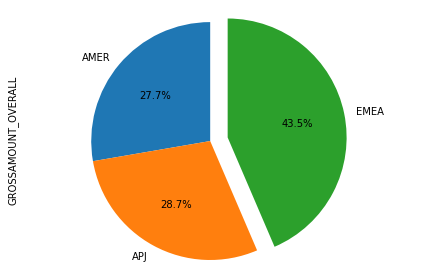

In [ ]:
total_sales.plot.pie(y=Products_sales_master.index,
           shadow=False,
           explode=(0, 0, 0.15),
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()

From above pie chart, it is clear that EMEA organization has contributed the most sales.

**Finding sales per product**

There are bikes of different models and categories. To find the bike model that sold out the most, we use the following code:

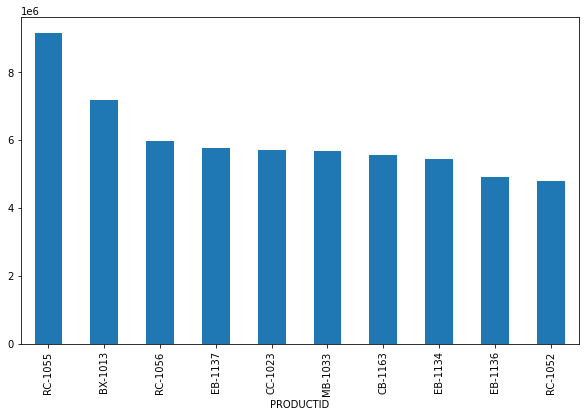

In [ ]:
product_sales = Products_sales_master.groupby('PRODUCTID')['GROSSAMOUNT_OVERALL'].sum().sort_values(ascending = False).head(10)
product_sales.plot(kind='bar',figsize=(10,6));


From above bar graph, the top 10 bike models that sold the most were represented. Also, we can observe that bike RC-1055, which is racing bike, model - Veloflash, was most in demand.

**Which Employee contributed the most to the sales?**

In [ ]:
reward=pd.merge(Employee_master[["NAME_FIRST","NAME_LAST","EMPLOYEEID"]],sales_all[["GROSSAMOUNT_OVERALL","CREATEDBY"]], left_on='EMPLOYEEID', right_on='CREATEDBY' )
reward["Full Name"]= reward["NAME_FIRST"]+[" "]+reward["NAME_LAST"]
reward_2=reward.groupby(["Full Name"]).mean()
reward_2[reward_2["GROSSAMOUNT_OVERALL"]==reward_2["GROSSAMOUNT_OVERALL"].max()][["GROSSAMOUNT_OVERALL"]]


,GROSSAMOUNT_OVERALL
Full Name,
Kenneth Weise,92178.964286


So, **Kenneth Weise was the top employee**, who contributed the most in the gross amount.

To check the performance of all employees, following bar graph is made.

In [ ]:
reward_2 = reward_2.reset_index()
reward_2 = reward_2.sort_values(by=['GROSSAMOUNT_OVERALL'],ascending=False)
fig = px.bar(reward_2, x='Full Name', y='GROSSAMOUNT_OVERALL')
fig.show()


**What category of bikes were sold out the most?**


Among 9 product category, we need to find which bike category was in demand.

In [ ]:
most_sel=pd.merge(Products_master[["SHORT_DESCR_CAT","PRODUCTID",'PRODCATEGORYID' ]],sales_all[["QUANTITY",'PRODUCTID']] ,on='PRODUCTID')
most_sel.head(5)
most_sel2=most_sel.pivot_table(index=['SHORT_DESCR_CAT'],aggfunc=sum)
most_sel2.reindex(most_sel2['QUANTITY'].sort_values(ascending=False).index)
most_sel2 = most_sel2.reset_index()
most_sel2 = most_sel2.sort_values(by=['QUANTITY'],ascending=False)
most_sel2

,SHORT_DESCR_CAT,QUANTITY
6,Racing Bike,2279
8,eBike,1825
0,BMX,1701
4,Hybrid Bike,1288
5,Mountain Bike,953
2,Cyclo cross Bike,871
1,Cruiser,843
3,Downhill Bike,802
7,Road Bike,658


In [ ]:
import plotly.express as px
fig = px.bar(most_sel2, x='SHORT_DESCR_CAT', y='QUANTITY')
fig.show()

From above bar graph, we observe that racing bikes were in demand, while road bikes were not purchased by many. Also, ebikes and BMX were also sold out in large quantity.

**When is the best time of the year to sell bikes?** 

Now, we analyze the trend of the quantity of bikes sold in each month, to find the best time of the year to sell bikes.

In [ ]:
best_month=sales_all[["QUANTITY","CREATEDAT"]]
mon=pd.DatetimeIndex(sales_all["CREATEDAT"]).month
res=best_month.groupby(mon).sum().reset_index()
res

,CREATEDAT,QUANTITY
0,1,974
1,2,1264
2,3,953
3,4,1198
4,5,1146
5,6,1068
6,7,719
7,8,472
8,9,796
9,10,684


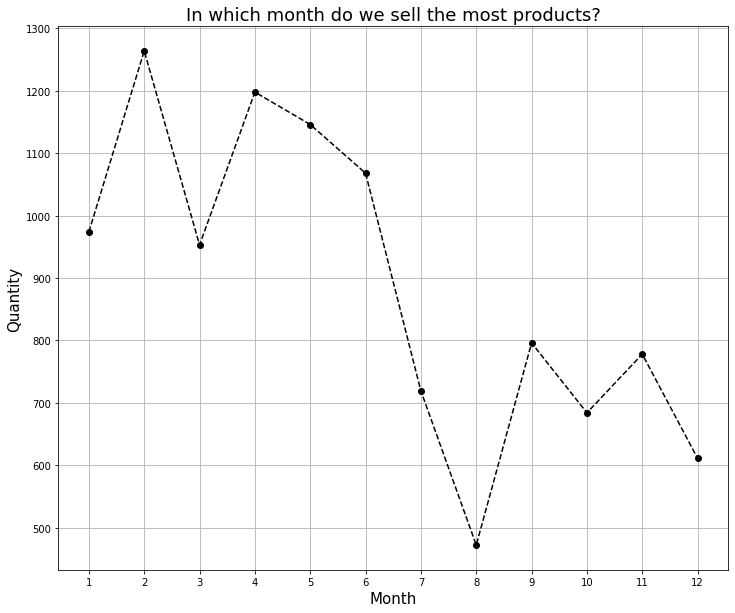

In [ ]:
plt.figure(figsize = (12, 10))
plt.grid(True)
plt.ylabel("Quantity",fontsize=15)
plt.xlabel("Month",fontsize=15)
plt.xticks([i for i in range(13)])
plt.title("In which month do we sell the most products?",fontsize=18)
plt.plot(res["CREATEDAT"], res["QUANTITY"],linestyle='dashed',marker='o',color='k')
plt.show()

We can observe from above plot that February was the best month, when maximum number of bikes were sold out.

#CORRELATION<a id='correlation'></a>

**Correlation**

In our datset, we have both categorical and numerical variables. But to check their correlation, we have two tests: Pearson and Spearmann. For checking correaltion between numerical variables, we use Paerson, while for checkng correlation between numercal and ordinal (categorical), we use Spearmann. So, first we check the type of columns we are interseted in:

In [ ]:
col_to_int = ['PRODUCTID',"PRODCATEGORYID","SALESORG","SUPPLIER_PARTNERID","QUANTITY","GROSSAMOUNT_OVERALL","SALESORDERID"]
Products_sales_master[col_to_int].dtypes

PRODUCTID               object
PRODCATEGORYID          object
SALESORG                object
SUPPLIER_PARTNERID       int64
QUANTITY                 int64
GROSSAMOUNT_OVERALL    float64
SALESORDERID             int64
dtype: object

In [ ]:
master = Products_sales_master[col_to_int]
master.head()


,PRODUCTID,PRODCATEGORYID,SALESORG,SUPPLIER_PARTNERID,QUANTITY,GROSSAMOUNT_OVERALL,SALESORDERID
0,RO-1001,RO,EMEA,100000000,5,6951.0,500000187
1,RO-1001,RO,EMEA,100000000,3,8266.0,500000257
2,RO-1001,RO,AMER,100000000,10,21695.0,500000086
3,RO-1001,RO,APJ,100000000,6,21862.0,500000143
4,RO-1001,RO,AMER,100000000,5,27515.0,500000019


Now, we convert 3 categorical variables 'PRODUCTID', "PRODCATEGORYID", "SALESORG" into ordinal by using the following code:

In [ ]:
pdt_id = pd.unique(Products_master['PRODUCTID'].values.ravel()).tolist()
len(pdt_id)
pdt_dict = {}
count = 0
for i in pdt_id:
  count = count+1
  pdt_dict[i]= count
pdt_dict


{'BX-1011': 4,
 'BX-1012': 5,
 'BX-1013': 6,
 'BX-1014': 7,
 'BX-1015': 8,
 'BX-1016': 9,
 'CB-1161': 34,
 'CB-1162': 35,
 'CB-1163': 36,
 'CC-1021': 10,
 'CC-1022': 11,
 'CC-1023': 12,
 'DB-1081': 24,
 'DB-1082': 25,
 'DB-1083': 26,
 'EB-1131': 27,
 'EB-1132': 28,
 'EB-1133': 29,
 'EB-1134': 30,
 'EB-1135': 31,
 'EB-1136': 32,
 'EB-1137': 33,
 'HB-1171': 37,
 'HB-1172': 38,
 'HB-1173': 39,
 'HB-1174': 40,
 'HB-1175': 41,
 'HB-1176': 42,
 'MB-1031': 13,
 'MB-1032': 14,
 'MB-1033': 15,
 'MB-1034': 16,
 'RC-1051': 17,
 'RC-1052': 18,
 'RC-1053': 19,
 'RC-1054': 20,
 'RC-1055': 21,
 'RC-1056': 22,
 'RC-1057': 23,
 'RO-1001': 1,
 'RO-1002': 2,
 'RO-1003': 3}

In [ ]:
cat_id = pd.unique(Products_sales_master['PRODCATEGORYID'].values.ravel()).tolist()
len(cat_id)
cat_dict = {}
count = 0
for i in cat_id:
  count = count+1
  cat_dict[i]= count
cat_dict

{'BX': 2,
 'CB': 8,
 'CC': 3,
 'DB': 6,
 'EB': 7,
 'HB': 9,
 'MB': 4,
 'RC': 5,
 'RO': 1}

In [ ]:
org_id = pd.unique(Products_sales_master['SALESORG'].values.ravel()).tolist()
len(org_id)
org_dict = {}
count = 0
for i in org_id:
  count = count+1
  org_dict[i]= count
org_dict

{'AMER': 2, 'APJ': 3, 'EMEA': 1}

In [ ]:
Products_sales_master['PRODUCTID'] = Products_sales_master['PRODUCTID'].replace(pdt_dict)
Products_sales_master['PRODCATEGORYID'] = Products_sales_master['PRODCATEGORYID'].replace(cat_dict)
Products_sales_master['SALESORG'] = Products_sales_master['SALESORG'].replace(org_dict)

Products_sales_master.head()

,PRODUCTID,TYPECODE,PRODCATEGORYID,CREATEDBY_PDT,CREATEDAT_PDT,CHANGEDBY_x,CHANGEDAT_x,SUPPLIER_PARTNERID,QUANTITYUNIT_x,WEIGHTMEASURE,CURRENCY,PRICE,LANGUAGE_PDT,SHORT_DESCR_PDT,CREATEDBY_CAT,SHORT_DESCR_CAT,SALESORDERID,CREATEDBY,CREATEDAT,CHANGEDBY_y,CHANGEDAT_y,PARTNERID,SALESORG,CURRENCY_OVERALL,GROSSAMOUNT_OVERALL,NETAMOUNT_OVERALL,TAXAMOUNT_OVERALL,SALESORDERITEM,CURRENCY_IND,GROSSAMOUNT_IND,NETAMOUNT_IND,TAXAMOUNT_IND,ITEMATPSTATUS,QUANTITY,QUANTITYUNIT_y,DELIVERYDATE
0,1,PR,1,9,2018-10-03,9,2018-10-03,100000000,EA,7.7,USD,525,EN,Roady 1001,12,Road Bike,500000187,3,2018-11-02,3,2018-11-07,100000008,1,USD,6951.0,6082.125,868.875,20,USD,525.0,459.375,65.625,I,5,EA,1970-01-01 00:00:00.020190102
1,1,PR,1,9,2018-10-03,9,2018-10-03,100000000,EA,7.7,USD,525,EN,Roady 1001,12,Road Bike,500000257,8,2019-02-10,8,2019-02-11,100000035,1,USD,8266.0,7232.750,1033.250,10,USD,525.0,459.375,65.625,I,3,EA,1970-01-01 00:00:00.020190315
2,1,PR,1,9,2018-10-03,9,2018-10-03,100000000,EA,7.7,USD,525,EN,Roady 1001,12,Road Bike,500000086,14,2018-05-23,14,2018-05-24,100000004,2,USD,21695.0,18983.125,2711.875,20,USD,525.0,459.375,65.625,I,10,EA,1970-01-01 00:00:00.020180715
3,1,PR,1,9,2018-10-03,9,2018-10-03,100000000,EA,7.7,USD,525,EN,Roady 1001,12,Road Bike,500000143,5,2018-08-29,5,2018-09-01,100000020,3,USD,21862.0,19129.250,2732.750,10,USD,525.0,459.375,65.625,I,6,EA,1970-01-01 00:00:00.020181103
4,1,PR,1,9,2018-10-03,9,2018-10-03,100000000,EA,7.7,USD,525,EN,Roady 1001,12,Road Bike,500000019,12,2018-02-07,12,2018-02-10,100000034,2,USD,27515.0,24075.625,3439.375,20,USD,525.0,459.375,65.625,I,5,EA,1970-01-01 00:00:00.020180401


After converting numerical into ordinal, we run spaermann test to check correlation between following variables:

In [ ]:
For_Corr_spear=Products_sales_master[['PRODUCTID',"PRODCATEGORYID","SALESORG","GROSSAMOUNT_OVERALL"]]
corr_spear=For_Corr_spear.corr(method="spearman")
corr_spear.style.background_gradient(cmap='coolwarm')


,PRODUCTID,PRODCATEGORYID,SALESORG,GROSSAMOUNT_OVERALL
PRODUCTID,1.000000,0.990447,0.016094,0.041084
PRODCATEGORYID,0.990447,1.000000,0.013921,0.033986
SALESORG,0.016094,0.013921,1.000000,0.056293
GROSSAMOUNT_OVERALL,0.041084,0.033986,0.056293,1.000000


From above heatmap, we can see that product id and product category id has strong positive linear relation. It is because product id involves the models and categories of bikes and product category id involves the bikes categories.Except that, we did not find any particular relation between variables.

Now, we run pearson test to check correlation between numerical variables:

In [ ]:
For_Corr_pearson=Products_sales_master[["SUPPLIER_PARTNERID","QUANTITY","GROSSAMOUNT_OVERALL","SALESORDERID"]]
corr_pearson=For_Corr_pearson.corr(method="pearson")
corr_pearson.style.background_gradient(cmap='coolwarm')

,SUPPLIER_PARTNERID,QUANTITY,GROSSAMOUNT_OVERALL,SALESORDERID
SUPPLIER_PARTNERID,1.000000,-0.012089,0.043357,-0.017359
QUANTITY,-0.012089,1.000000,0.115095,0.020182
GROSSAMOUNT_OVERALL,0.043357,0.115095,1.000000,0.139779
SALESORDERID,-0.017359,0.020182,0.139779,1.000000


From above heatmap, we found that 'SALESORDERID' and 'GROSSAMOUNT_OVERALL' has weak positive correlation. 

# Summary<a id='summary'></a>

* From our analysis, we have 3 sales organizations: AMER, APJ and EMEA. Among them, maximum sales (43.5%) has been done by EMEA, while APJ and AMER has contributed 28.7% and 27.7% in sales respectively.
* Among all product categories, racing bikes were the most liked and sold one. While, ebikes and BMX places second and third position respectively. So, organization should focus on advertising other category of bikes, which are less sold and provide offers on it.
* Among all racing bikes' products, RC-1055 (Racing bike- Veloflash) has been sold the most. Organization should showcase their star product to attract buyers.
* Maximum number of bikes were sold in the month of February with more than 1250 products being sold out. While, in August, less than 500 bikes were sold. So, company can provide some discounts during those months when sale is less.
* Kenneth Weise, Kirk Lee, and Ellis Robertson were the 3 top employees who contributed the most in the sales of products. To boost the performance of other employees, organization can provide some certificates, gifts or trophies to the top 3 employees.
